# MODELLING OF A FULL-SCALE DRAINAGE WATER TREATMENT WETLAND TO GAIN IN-DEPTH UNDERSTANDING AND DESIGN SUPPORT <a class="tocSkip">

## Introduction

**What it is**:
Constructed wetland system consisting of three filter beds identical in shape and internal dimensions.

**Purpose**:
The wetlands serve as a denitrifiaction barrier on a drainage water stream for reducing the NO3.

**Location**:
Near village Velký Rybník, Czech Republic


![alt text](misc/mapy.png)

## Description of the system

### Filter bed dimensions

System constits of three filter beds called M1, M2 and M3 which are identical in their shape and dimensions. Top surface lenght of the filters is 16 m, botom leght is 13 m, width is 5 m on top and 3 m on bottom and the depth is 1 m.
Inlet is on one side of the filter bed above the top surface and the outlet is connected to the drainage pipes on the bottom which go across the whole bottom lenght.

![](misc/pudorys.png)

## Input Data

Input data for the modelling of the wetlands consists of water flow measured in the division chamber before the wetlands and on the outlets from the wetlands, concentration of the tracer on the outflow and concentration of pollutants on the inflow and outflow.

### Importing Libraries

In [1]:
# importing libraries for further usage

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm

# this is local module with some helper functions 
# for presenting the results in jupyter
import hydrushelper as hh

%matplotlib inline

### Reading and Cleaning Input Data

In [81]:
# reading in the data table, plotting first 5 rows

data = pd.read_csv("data/input/tracer_study_2018.csv")
#data.head()
data = data.dropna(axis='columns', how='all')

In [82]:
# just info about the columns and the values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
date              60 non-null object
time              60 non-null object
timestamp         60 non-null object
time_diff_day     60 non-null float64
time_days         60 non-null float64
M1_tracer_mg-l    60 non-null object
M2_tracer_mg-l    56 non-null float64
M3_tracer_mg-l    60 non-null float64
M1_outflow        59 non-null float64
M2_outflow        60 non-null float64
M3_outflow        60 non-null float64
P6_inflow         50 non-null float64
dtypes: float64(8), object(4)
memory usage: 5.7+ KB


Values for M1 tracer can't be read as number (float values), so there is some problem with.

In [83]:
data["M1_tracer_mg-l"].unique()

array(['0.000', '1.714', '1.994', '1.927', '1.950', '<0,02', '0.158',
       '0.214', '0.144', '0.161', '0.232', '0.142', '0.157', '0.169',
       '0.190', '0.213', '0.145', '0.178', '0.181', '0.194', '0.187',
       '0.148', '0.201', '0.166', '0.211', '0.137', '0.151', '0.084',
       '0.132', '0.131', '0.146', '0.176', '0.15', '0.119', '0.112',
       '0.05'], dtype=object)

It is a problem with values below the detection limit (<0,02), we will replace this values with 0.01 (as the mean between 0 and detection limit) and change all values to floats from strings.

In [84]:
data["M1_tracer_mg-l"] = (data["M1_tracer_mg-l"]
                              .str.replace("<0,02", "0.01")
                              .astype(float)
                          )

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
date              60 non-null object
time              60 non-null object
timestamp         60 non-null object
time_diff_day     60 non-null float64
time_days         60 non-null float64
M1_tracer_mg-l    60 non-null float64
M2_tracer_mg-l    56 non-null float64
M3_tracer_mg-l    60 non-null float64
M1_outflow        59 non-null float64
M2_outflow        60 non-null float64
M3_outflow        60 non-null float64
P6_inflow         50 non-null float64
dtypes: float64(9), object(3)
memory usage: 5.7+ KB


In [86]:
# we will save the cleaned dataframe as csv for further usage

data.to_csv("data/inter/tracer_study_2018_cleaned.csv", index=False)

#### Data colums description

| name          | meaning                              | units|
| ---           | ---                                  | ---  |                
|time_diff_day  | time difference between timestamps   | days |    
|time_days      | absolute time from beginning         | days |      
|M1_tracer_mg-l | concentration of Br tracer on outlet | mg/l |    
|M1_outflow     | outflow from the filter bed          | l/s  |       
|P6_inflow      | inflow to the system                 | l/s  |   

### Input Hydraulic Data Description

#### Water Flow Plot

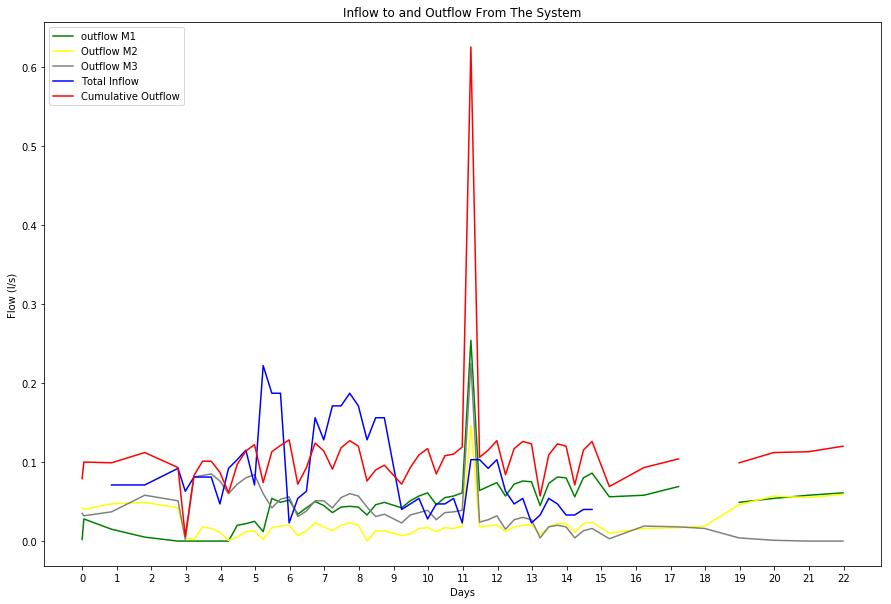

In [2]:
data = pd.read_csv("data/inter/tracer_study_2018_cleaned.csv")

fig = plt.figure(figsize=(15, 10))

x = data["time_days"]

outflow_M1 = data["M1_outflow"]
outflow_M2 = data["M2_outflow"]
outflow_M3 = data["M3_outflow"]
inflow_P6 = data["P6_inflow"]
outflow_cum = outflow_M1 + outflow_M2 + outflow_M3

plt.plot(x, outflow_M1, label='outflow M1', c='green')
plt.plot(x, outflow_M2, label='Outflow M2', c='yellow')
plt.plot(x, outflow_M3, label='Outflow M3', c='gray')
plt.plot(x, inflow_P6, label='Total Inflow', c='blue')
plt.plot(x, outflow_cum, label='Cumulative Outflow', c='red')

plt.xlabel('Days')
plt.ylabel('Flow (l/s)')
plt.title('Inflow to and Outflow From The System')
plt.legend(loc='upper left')

plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.show()

#### Tracer Concentrations Plot

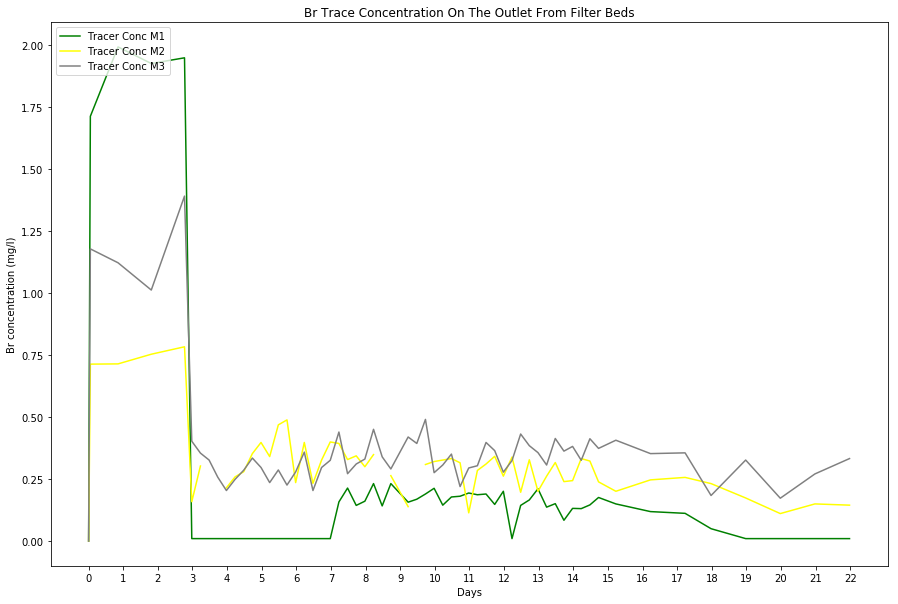

In [4]:
fig = plt.figure(figsize=(15, 10))

# x already defined above

tracer_M1 = data["M1_tracer_mg-l"]
tracer_M2 = data["M2_tracer_mg-l"]
tracer_M3 = data["M3_tracer_mg-l"]

plt.plot(x, tracer_M1, label='Tracer Conc M1', c='green')
plt.plot(x, tracer_M2, label='Tracer Conc M2', c='yellow')
plt.plot(x, tracer_M3, label='Tracer Conc M3', c='gray')

plt.xlabel('Days')
plt.ylabel('Br concentration (mg/l)')
plt.title('Br Trace Concentration On The Outlet From Filter Beds')
plt.legend(loc='upper left')

plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.show()

#### M1 plot

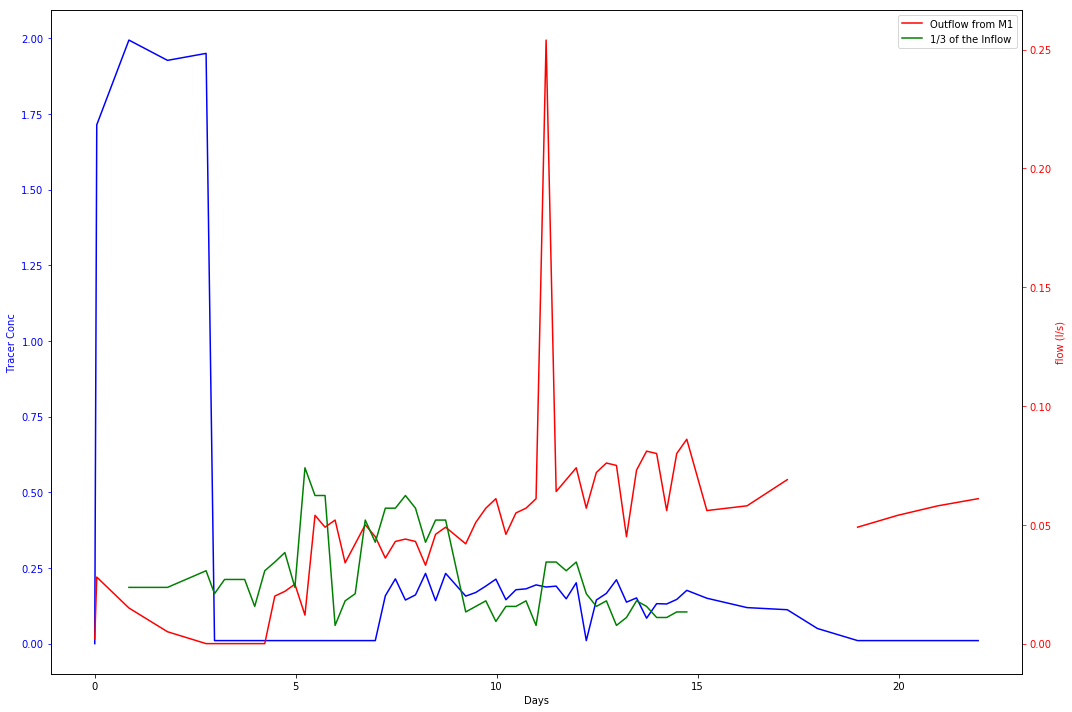

In [6]:
fig, ax1 = plt.subplots(figsize=(15, 10))

ax1.plot(x, tracer_M1, 'b-', label='Tracer Concentration')
ax1.set_xlabel('Days')

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Tracer Conc', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(x, outflow_M1, 'r-', label='Outflow from M1')
ax2.set_ylabel('flow (l/s)', color='r')
ax2.tick_params('y', colors='r')

# set the third line plot with the same Y axix as the second
ax3 = ax2
ax3.plot(x, (inflow_P6 / 3), 'g-', label='1/3 of the Inflow')

plt.legend()

fig.tight_layout()
plt.show()

#### M2 plot

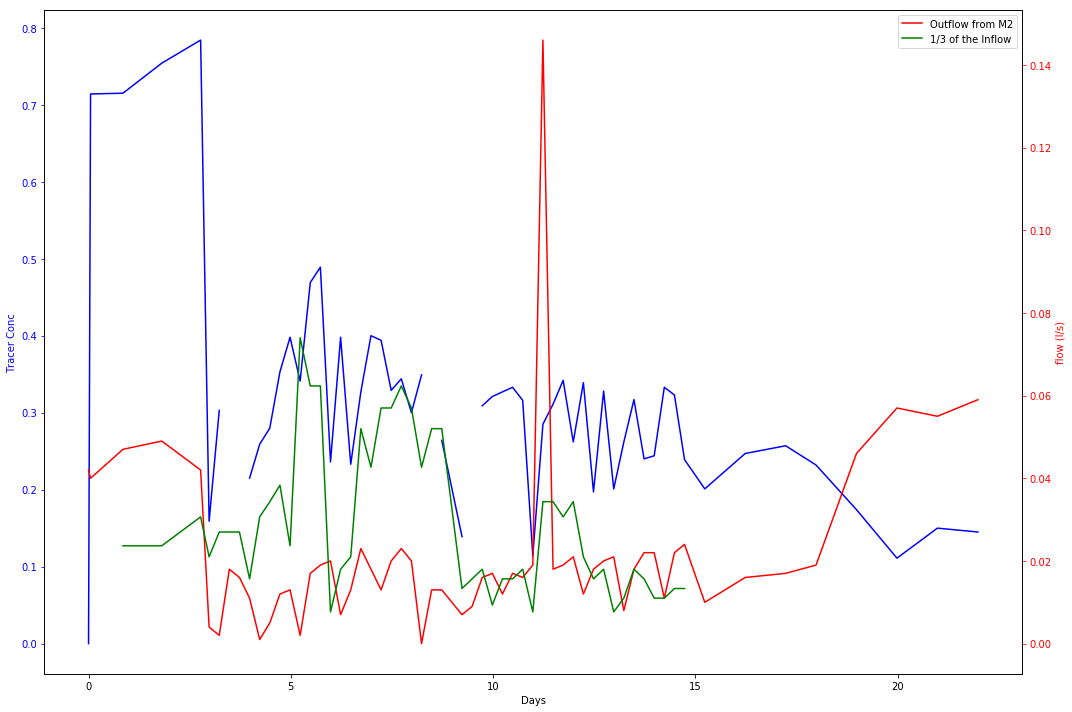

In [8]:
fig, ax1 = plt.subplots(figsize=(15, 10))

ax1.plot(x, tracer_M2, 'b-', label='Tracer Concentration')
ax1.set_xlabel('Days')

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Tracer Conc', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(x, outflow_M2, 'r-', label='Outflow from M2')
ax2.set_ylabel('flow (l/s)', color='r')
ax2.tick_params('y', colors='r')

# set the third line plot with the same Y axix as the second
ax3 = ax2
ax3.plot(x, (inflow_P6 / 3), 'g-', label='1/3 of the Inflow')

plt.legend()

fig.tight_layout()
plt.show()

#### M3 Plot

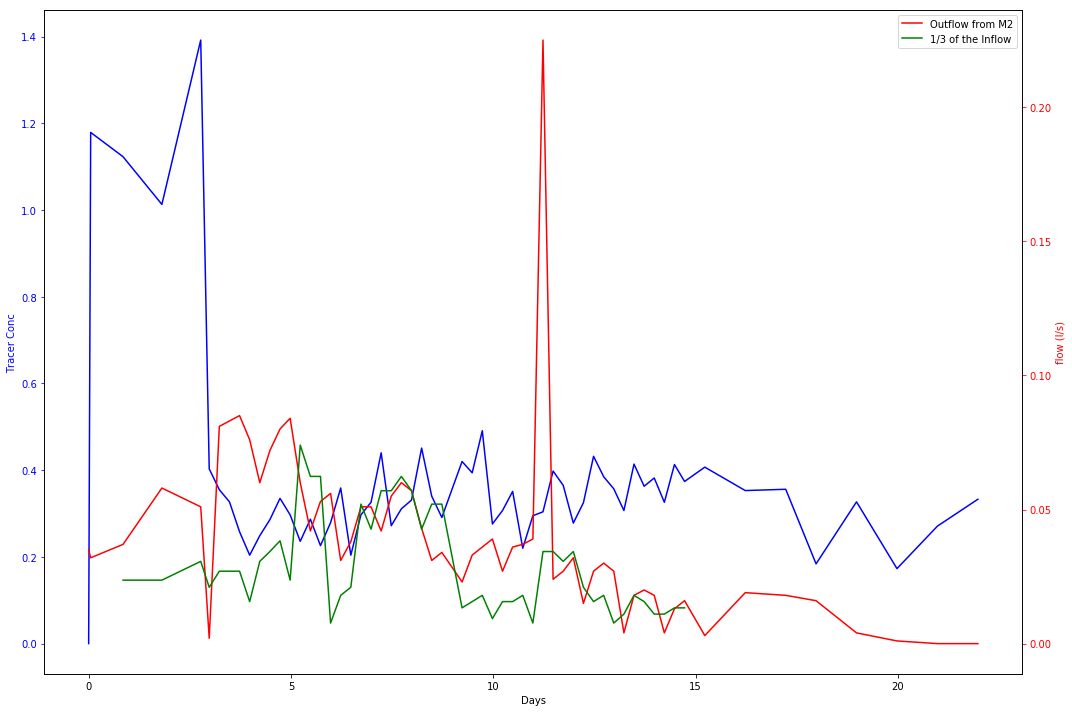

In [9]:
fig, ax1 = plt.subplots(figsize=(15, 10))

ax1.plot(x, tracer_M3, 'b-', label='Tracer Concentration')
ax1.set_xlabel('Days')

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Tracer Conc', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(x, outflow_M3, 'r-', label='Outflow from M2')
ax2.set_ylabel('flow (l/s)', color='r')
ax2.tick_params('y', colors='r')

# set the third line plot with the same Y axix as the second
ax3 = ax2
ax3.plot(x, (inflow_P6 / 3), 'g-', label='1/3 of the Inflow')

plt.legend()

fig.tight_layout()
plt.show()

<a id=flow></a>
### Summary and conclusions from the hydraulic data

The inflow to the system is measured before the division chamber, but from the data presented here it seems that the division of water is not uniform. If we divide the inflow by 3 and plot it with measured outflow from each wetland, there is now observable pattern which can be followed. Simply put, if we compare all the plots for all three wetlands it seems that the **outflow does not correspond with the inflow** in any manner. This probably can't be explained by other processes like evapotranspiration or water retention because for example for the M1 and M3 wetlands there is no peak inflow measured but quite high peak outflow. **The non-uniform division of the water inflow is probably the only valid explanation here**.
On these basis we can't use the inflow hydraulic data as the input for the model because we don't know how is the total inlow divided between the three filter beds. We can only make a simplification here and assume that the filter beds can be hydraulicaly simplified to a tank full of water, where the inflow is almost immediately represented by the outflow (no water retention and no flatenning of peak inflows).

## Hydraulic parameters of the models 

### Filter medium hydraulic parameters - review

-The M1 and M2 filters consists of three main layrs which can be distinguish by their hydraulic parameters:

* `main filter layer` composed from mix of gravel 4-8 mm and birch wood-chips
* `inlet zone` form gravel 16-32 mm
* `drainage layer` which is mix of main filter zone and drainage pipes (diameter 100 mm) spanning across the whole bottom of the filter

The literature is quite inconclusive about the hydraulic properties of materials in horizontal flow wetlands which is partly due to the (sometimes rapid) change of these properties during time. It is mainly caused by the growth of the vegetation, clogging of the filter and of course the type of material being used <cite data-cite="360450/RCW7MBRA"></cite>.

We can found different Ks (saturated hydraulic conductivity) in literature:

For example the Ks in HSSF pilot-scale system for gravel with D60 = 9.1 mm differed from approx. 1500 m/day to 2800 m/day according the position in the wetland and vegetation type <cite data-cite="360450/Y9P3Y5RF"></cite>. For a full scale HSSF wetland with different size of gravel the media the overall Ks range from approx. 35 m/day to 390 m/day <cite data-cite="360450/SFK62IAM"></cite>. And finally the previously mentioned study <cite data-cite="360450/RCW7MBRA"></cite> states the Ks for pea gravel (with no size defined but usually pea gravel is 3/8" = 10 mm) in range from 2500 to 5200 m/day.

Values of Ks for different types of gravel media aggregated from several studies are stated in US EPA manual for constructed wetlands <cite data-cite="360450/CPWLTVIQ"></cite>. We present here the table from this manual as a starting point for hydraulic parameters of gravel in our study.

![](misc\Ks_EpaManual.jpg)

The hydraulic properties of wood-chip filter beds can also be found in literature. According to a technical note on denitrifying bioreactor fill media the porosity for most common types of wood-chips in this reactors varied from 66% to 78% and the average Ks was 9.5 cm/s (8208 m/d) <cite data-cite="360450/L39UMPIF"></cite>.

Another interesting data on this topic can be found in <cite data-cite="360450/RXKR3WJE"></cite> which is a study on hydraulic properties of different mixtures of gravel and wood-chips. The data are summarized in table below.  

![](misc/gravel_chips.png)

### Filter medium hydraulic parameters - input

<a id='materials'></a>
**On the basis of this data we decided to define the parameters of different materials (layers) in filter beds as such**:

| Material name | Composition      | Ks (m/day) | Ks (m/hour) | Porosity |
| ------------- | -----------      | -----      | --------    | -------- |
| Inlet zone    | gravel 16-32 mm  | 60 000     | 2500        | 37%      |
| Filter G/W    | gravel 4-8 mm/WC | 12 000     | 500         | 40%      |
| Filter G      | gravel 4-8 mm    | 10 000     | 416.667     | 37%      |
| Wood-chips    | birch wood-chips | 11 000     | 458.33      | 43%      |
| Drainage      | gravel and pipes | 100 000    | 4166.67     | 70%      |

The parameters of the materials are defined like this for start of the simulation and can be change according to the intermediate results. The values of parameters will be always stated before the next simulation step.

## Hydrus Hydraulic Simulations

### Computational Domain Definition

As the Hydrus Wetland module can work only with 2D simple domain type, we had to adjust the real-world trapezoidal shape of the wetland bed to a rectangular form.

The domain is defined according the following picture:

![](misc/domain_definition_1.png)

<a id='mesh'></a>
**Domain Type and Units Definition**<br/>
Type of Geometry:  2D - Simple<br/>
2D-Domain Options: 2D - Verticla Plane XZ<br/> 
Units:             meters<br/>
Initial Workspace: Xmin = 0 m, Xmax = 15 m, Zmin = 0 m, Zmax = 2 m  

**Rectangular Domain Definition**
Lx = 14 m, Lz = 1 m, alfa = 0°

This domain setup is the same for all computational cases

**FE-Mesh Parameters**</br>
Mesh Discretization:

|-	|X discret.	|-	|Y discret.	|  
|----------	|----------	|----------	|----------	
|count	|52	|-	|21	|  
|	|x [m]	|dz [m]	|z [m]	|  
|1	|0	|0	|1	|  
|2	|0.1	|0	|0.95	|  
|3	|0.2	|0	|0.9	|  
|4	|0.3	|0	|0.85	|  
|5	|0.4	|0	|0.8	|  
|6	|0.5	|0	|0.75	|  
|7	|0.6	|0	|0.7	|  
|8	|0.7	|0	|0.65	|  
|9	|0.9	|0	|0.6	|  
|10	|1.1	|0	|0.55	|  
|11	|1.3	|0	|0.5	|  
|12	|1.5	|0	|0.45	|  
|13	|1.8	|0	|0.4	|  
|14	|2.1	|0	|0.35	|  
|15	|2.4	|0	|0.3	|  
|16	|2.7	|0	|0.25	|  
|17	|3	|0	|0.2	|  
|18	|3.3	|0	|0.15	|  
|19	|3.6	|0	|0.1	|  
|20	|3.9	|0	|0.05	|  
|21	|4.4	|0	|0	|  
|22	|4.9	|0	|-	|  
|23	|5.4	|0	|-	|  
|24	|5.9	|0	|-	|  
|25	|6.4	|0	|-	|  
|26	|6.9	|0	|-	|  
|27	|7.4	|0	|-	|  
|28	|7.9	|0	|-	|  
|29	|8.4	|0	|-	|  
|30	|8.9	|0	|-	|  
|31	|9.4	|0	|-	|  
|32	|9.7	|0	|-	|  
|33	|10	|0	|-	|  
|34	|10.3	|0	|-	|  
|35	|10.6	|0	|-	|  
|36	|10.9	|0	|-	|  
|37	|11.2	|0	|-	|  
|38	|11.5	|0	|-	|  
|39	|11.8	|0	|-	|  
|40	|12.1	|0	|-	|  
|41	|12.4	|0	|-	|  
|42	|12.6	|0	|-	|  
|43	|12.8	|0	|-	|  
|44	|13	|0	|-	|  
|45	|13.2	|0	|-	|  
|46	|13.4	|0	|-	|  
|47	|13.5	|0	|-	|  
|48	|13.6	|0	|-	|  
|49	|13.7	|0	|-	|  
|50	|13.8	|0	|-	|  
|51	|13.9	|0	|-	|  
|52	|14	|0	|-	|  

### Initial Setup

The domain is defined according to [chapter 5.1](#mesh) and material definition according to [chapter 4.2.](#materials)

#### Time and Waterflow

For initial setup the time will be set to 48 hours and water flow to average flow as follows.

In [13]:
average_flow = data["P6_inflow"].mean()
print("The average inflow to whole system is %.3f l/s" % average_flow)
print("The average inflow in one bed should be %.3f l/s" % (average_flow / 3))

The average inflow to whole system is 0.087 l/s
The average inflow in one bed should be 0.029 l/s


hydraulic loading rate calculation:

In [79]:
inflow_ls = average_flow / 3 # inflow to one bed in l/s
inflow_mh = (inflow_ls / 1000) * 3600 # inflow in m3/h

# surface area of the rectangular representation of the inlet zone in m2
inlet_area = 4 * 0.5 

# hydraulic loading rate of the inlet zone m/h
hlr_init = inflow_mh / inlet_area

print("Time variable boundary should be set to:")
print("Time: 24 [hours]")
print("Precip: %.3f [m/h]" % hlr_init)
print("Evap.: 0 [m/h]")
print("Transp.: 0 [m/h]")
print("hCritA.: 100 [m]")

Time variable boundary should be set to:
Time: 24 [hours]
Precip: 0.052 [m/h]
Evap.: 0 [m/h]
Transp.: 0 [m/h]
hCritA.: 100 [m]


#### Initial Setup Simulation Results

##### Reading the Hydrus output files

In [16]:
# copying the output file(s) from temporary working directory of the M1_initial case to the permanent directory
hh.copy_output()

List of projects in the Hydrus working directory:
M1_initi
M3_initi

Enter the projet name from the printed list: M1_initi

List of output files in the M1_initi working directory
A_Level.out
Balance.out
Boundary.out
Check.out
Cum_Q.out
h.out
h_Mean.out
ObsNod.out
Run_Inf.out
th.out
v.out
v_Mean.out

Enter the file name(s) you want to copy: v_Mean.out Cum_Q.out

Filename: v_Mean.out
Source: C:\HYDRUS\Temp\~Hydrus3D_2xx\M1_initi\v_Mean.out
Destination: D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1_initi\v_Mean.out
file v_Mean.out succesefuly copied to D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1_initi\v_Mean.out
Filename: Cum_Q.out
Source: C:\HYDRUS\Temp\~Hydrus3D_2xx\M1_initi\Cum_Q.out
Destination: D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1_initi\Cum_Q.out
file Cum_Q.out succesefuly copied to D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1_initi\Cum_Q.out


In [17]:
# copying the output file(s) from temporary working directory of the M3_initial case to the permanent directory
hh.copy_output()

List of projects in the Hydrus working directory:
M1_initi
M3_initi

Enter the projet name from the printed list: M3_initi

List of output files in the M3_initi working directory
A_Level.out
Balance.out
Boundary.out
Check.out
Cum_Q.out
h.out
h_Mean.out
ObsNod.out
Run_Inf.out
th.out
v.out
v_Mean.out

Enter the file name(s) you want to copy: Cum_Q.out v_Mean.out

Filename: Cum_Q.out
Source: C:\HYDRUS\Temp\~Hydrus3D_2xx\M3_initi\Cum_Q.out
Destination: D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M3_initi\Cum_Q.out
file Cum_Q.out succesefuly copied to D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M3_initi\Cum_Q.out
Filename: v_Mean.out
Source: C:\HYDRUS\Temp\~Hydrus3D_2xx\M3_initi\v_Mean.out
Destination: D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M3_initi\v_Mean.out
file v_Mean.out succesefuly copied to D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M3_initi\v_Mean.out


In [10]:
# read the data from v_Mean.out for M1 initial case with helper function
m1_init_mean = hh.read_file()

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1_initi\v_Mean.out were read into the Pandas DataFrame


In [11]:
# read the data from Cum_Q.out for M1 initial case with helper function
m1_init_cum = hh.read_file()

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1_initi\Cum_Q.out were read into the Pandas DataFrame


In [12]:
# read the data from v_Mean.out for M3 initial case with helper function
m3_init_mean = hh.read_file()

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M3_initi\v_Mean.out were read into the Pandas DataFrame


In [13]:
# read the data from Cum_Q.out for M3 initial case with helper function
m3_init_cum = hh.read_file()

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M3_initi\Cum_Q.out were read into the Pandas DataFrame


In [18]:
m1_init_mean.head(2)

,time,pot_surface_flux_atm,act_surface_flux_atm,total_boundary_flux,average_infil_flux
0,0.001,-0.052042,-0.052042,-0.012451,0.052042
1,0.002,-0.052042,-0.052042,-0.013672,0.052042


In [19]:
m1_init_cum.head(2)

,time,c_pot_surface_flux_atm,c_act_surface_flux_atm,c_total_boundary_flux,c_infil_flux
0,0.001,-0.000026,-0.000026,-0.000012,0.000026
1,0.002,-0.000052,-0.000052,-0.000026,0.000052


In [20]:
m3_init_mean.head(2)

,time,pot_surface_flux_atm,act_surface_flux_atm,total_boundary_flux,average_infil_flux
0,0.001,-0.052042,-0.052042,-0.001465,0.052042
1,0.002,-0.052042,-0.052042,0.000732,0.052042


In [21]:
m3_init_cum.head(2)

,time,c_pot_surface_flux_atm,c_act_surface_flux_atm,c_total_boundary_flux,c_infil_flux
0,0.001,-0.000026,-0.000026,-1.464800e-06,0.000026
1,0.002,-0.000052,-0.000052,-7.324200e-07,0.000052


##### Plotting the boundary water flux for initial cases

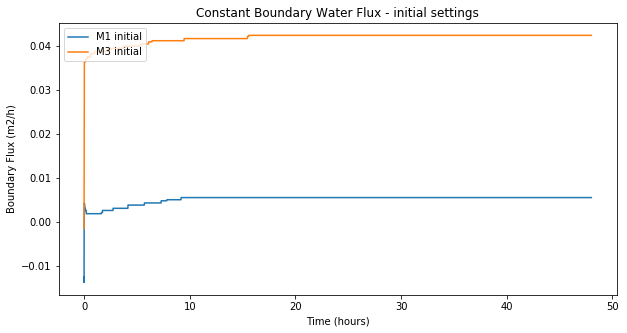

In [23]:
# plotting the data for M1 and M3 initial cases

fig, ax = plt.subplots(figsize=(10, 5))

x1 = m1_init_mean["time"]
y1 = m1_init_mean["total_boundary_flux"]

x3 = m3_init_mean["time"]
y3 = m3_init_mean["total_boundary_flux"]

ax.plot(x1, y1, label='M1 initial')
ax.plot(x3, y3, label='M3 initial')
ax.set_xlabel("Time (hours)")
ax.set_ylabel("Boundary Flux (m2/h)")
ax.set_title("Constant Boundary Water Flux - initial settings")
ax.legend(loc='upper left')

plt.show()

From the plot it seems that both cases reach the pseudo-steady state. Let's look on the cumulative fluxes also.

##### Plotting the cumulative water flux for initial cases

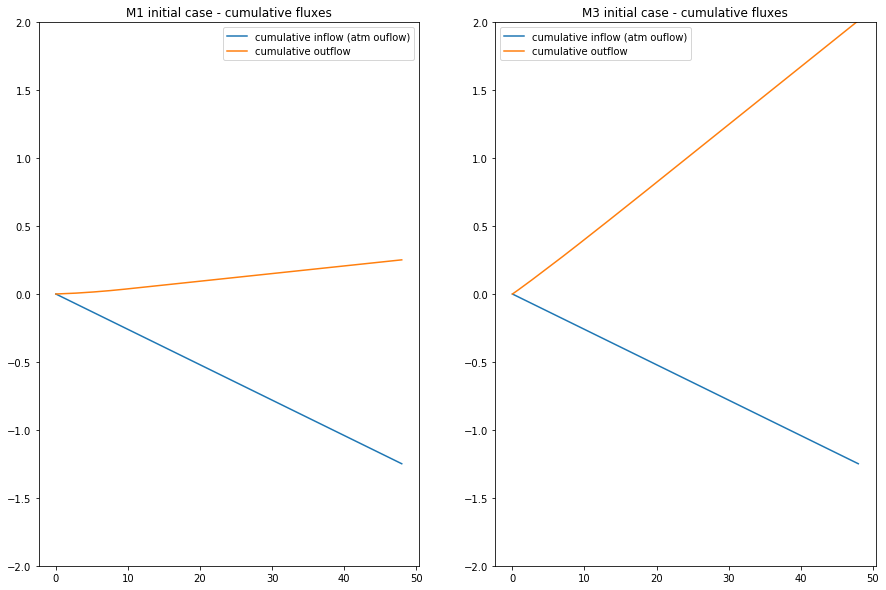

In [31]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(m1_init_cum["time"], m1_init_cum["c_act_surface_flux_atm"], label="cumulative inflow (atm ouflow)")
ax1.plot(m1_init_cum["time"], m1_init_cum["c_total_boundary_flux"], label="cumulative outflow")
ax1.set_title('M1 initial case - cumulative fluxes')
ax1.legend()
ax1.set_ylim(-2, 2)

ax2.plot(m3_init_cum["time"], m3_init_cum["c_act_surface_flux_atm"], label="cumulative inflow (atm ouflow)")
ax2.plot(m3_init_cum["time"], m3_init_cum["c_total_boundary_flux"], label="cumulative outflow")
ax2.set_title('M3 initial case - cumulative fluxes')
ax2.legend()
ax2.set_ylim(-2, 2)

plt.show()

**Conclusion**

As we can see form both graphs there is some sort of computational problem for both cases. In case M1 the cumulative outflow is much smaller then the cumulative inflow, so some water during the computation get lost..(setting a longer time didn't help)
In the other case the problem is even worse because somehow the there is greater amount of water on the outflow of the wetland then on the inflow, which is breaks the continuity equation a little bit. *(So maybe the water from M1 finds its way to M3..)*

**After several iterations with changed values of porosity and Ks for the materials, it can be stated that this situation is probably caused by too big value of Ks. Decreasing the values helps to stabilize the computation, so it will be done in the next step.**

### The Initial Setup Once Again

As written above the high values of Ks are probably causing some computational instabilities. On this basis I decided to lower the initial values by factor of 10 *(the reason why 10 is obvious - it can be easily computed and the values are similar to those in tutorial..)* for these "once again" initial setup. All other values remain same.

#### New Material Settings

**On the basis of this data we decided to define the parameters of different materials (layers) in filter beds as such**:

| Material name | Composition      | Ks (m/day) | Ks (m/hour) | Porosity |
| ------------- | -----------      | -----      | --------    | -------- |
| Inlet zone    | gravel 16-32 mm  | 6 000      | 250         | 37%      |
| Filter G/W    | gravel 4-8 mm/WC | 1 200      | 50          | 40%      |
| Filter G      | gravel 4-8 mm    | 1 000      | 41.667      | 37%      |
| Wood-chips    | birch wood-chips | 1 100      | 45.833      | 43%      |
| Drainage      | gravel and pipes | 1 0000     | 416.667     | 70%      |

The parameters of the materials are defined like this for start of the simulation and can be change according to the intermediate results. The values of parameters will be always stated before the next simulation step.

#### Reading the Hydrus Output Files

In [34]:
# copy M1_once_again files
hh.copy_output()

List of projects in the Hydrus working directory:
M1_initi
M1_once_
M3_initi
M3_once_

Enter the projet name from the printed list: M1_once_

List of output files in the M1_once_ working directory
A_Level.out
Balance.out
Boundary.out
Check.out
Cum_Q.out
h.out
h_Mean.out
ObsNod.out
Run_Inf.out
th.out
v.out
v_Mean.out

Enter the file name(s) you want to copy: v_Mean.out Cum_Q.out

Filename: v_Mean.out
Source: C:\HYDRUS\Temp\~Hydrus3D_2xx\M1_once_\v_Mean.out
Destination: D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1_once_\v_Mean.out
file v_Mean.out succesefuly copied to D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1_once_\v_Mean.out
Filename: Cum_Q.out
Source: C:\HYDRUS\Temp\~Hydrus3D_2xx\M1_once_\Cum_Q.out
Destination: D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1_once_\Cum_Q.out
file Cum_Q.out succesefuly copied to D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1_once_\Cum_Q.out


In [35]:
# copy M3_once_again files
hh.copy_output()

List of projects in the Hydrus working directory:
M1_initi
M1_once_
M3_initi
M3_once_

Enter the projet name from the printed list: M3_once_

List of output files in the M3_once_ working directory
A_Level.out
Balance.out
Boundary.out
Check.out
Cum_Q.out
h.out
h_Mean.out
ObsNod.out
Run_Inf.out
th.out
v.out
v_Mean.out

Enter the file name(s) you want to copy: v_Mean.out Cum_Q.out

Filename: v_Mean.out
Source: C:\HYDRUS\Temp\~Hydrus3D_2xx\M3_once_\v_Mean.out
Destination: D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M3_once_\v_Mean.out
file v_Mean.out succesefuly copied to D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M3_once_\v_Mean.out
Filename: Cum_Q.out
Source: C:\HYDRUS\Temp\~Hydrus3D_2xx\M3_once_\Cum_Q.out
Destination: D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M3_once_\Cum_Q.out
file Cum_Q.out succesefuly copied to D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M3_once_\Cum_Q.out


In [36]:
# reading in M1_once_again v_Mean.out
m1_once_mean = hh.read_file()

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1_once_\v_Mean.out were read into the Pandas DataFrame


In [37]:
# reading in M1_once_again Cum_Q.out
m1_once_cum = hh.read_file()

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1_once_\Cum_Q.out were read into the Pandas DataFrame


In [38]:
# reading in M3_once_again v_Mean.out
m3_once_mean = hh.read_file()

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M3_once_\v_Mean.out were read into the Pandas DataFrame


In [39]:
# reading in M3_once_again Cum_Q.out
m3_once_cum = hh.read_file()

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M3_once_\Cum_Q.out were read into the Pandas DataFrame


#### Plotting the "Once Again" output

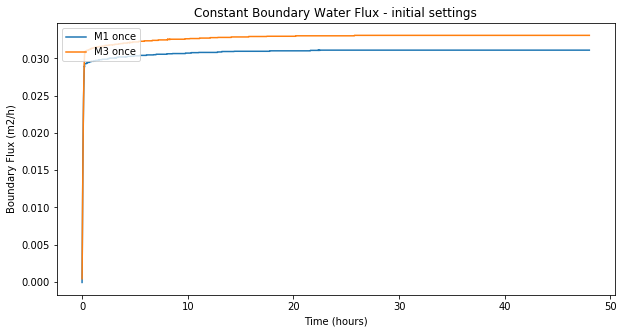

In [41]:
# plotting the boundary flux data for M1 and M3 "once again" cases

fig, ax = plt.subplots(figsize=(10, 5))

x1 = m1_once_mean["time"]
y1 = m1_once_mean["total_boundary_flux"]

x3 = m3_once_mean["time"]
y3 = m3_once_mean["total_boundary_flux"]

ax.plot(x1, y1, label='M1 once')
ax.plot(x3, y3, label='M3 once')
ax.set_xlabel("Time (hours)")
ax.set_ylabel("Boundary Flux (m2/h)")
ax.set_title("Constant Boundary Water Flux - initial settings")
ax.legend(loc='upper left')

plt.show()

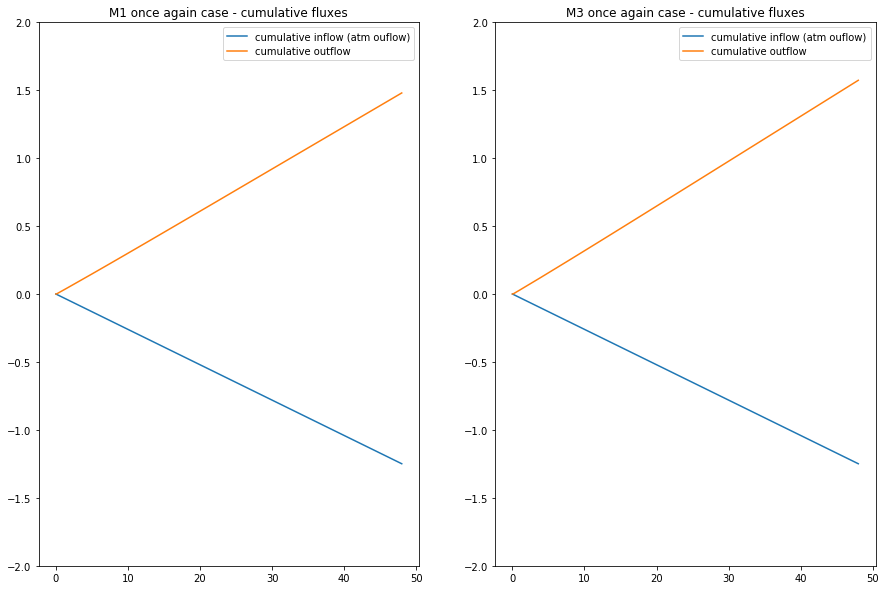

In [43]:
# Plotting the cumulative water flux for "once again" cases

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(m1_once_cum["time"], m1_once_cum["c_act_surface_flux_atm"], label="cumulative inflow (atm ouflow)")
ax1.plot(m1_once_cum["time"], m1_once_cum["c_total_boundary_flux"], label="cumulative outflow")
ax1.set_title('M1 once again case - cumulative fluxes')
ax1.legend()
ax1.set_ylim(-2, 2)

ax2.plot(m3_once_cum["time"], m3_once_cum["c_act_surface_flux_atm"], label="cumulative inflow (atm ouflow)")
ax2.plot(m3_once_cum["time"], m3_once_cum["c_total_boundary_flux"], label="cumulative outflow")
ax2.set_title('M3 once again case - cumulative fluxes')
ax2.legend()
ax2.set_ylim(-2, 2)

plt.show()

Even if there is still some minor disproportion in the inflow and outflow, according the presented graphs, the ouputs make really more sense now, so we use this settings as initial state for a real flow data scenario.

### Case M1flowA - measured flow, import initial

<a id='5-4-1'></a>
#### Problem description

As we do not have a reliable inflow data, the measured outflow is taken here as the inflow also (no retention or ponding effect is - [see chapter  3.4](#flow)).

As the inflow data can be only entered in Hydrus as a precipitation rate we need to do a liitle calculation first. 

What we have in the `data` table is the liter per second measurement in the given time. Let's see this for M1 wetland:

In [46]:
# first we will read the cleaned data

data = pd.read_csv("data/inter/tracer_study_2018_cleaned.csv")

In [47]:
m1_flow_data = data[["time_days", "time_diff_day", "M1_outflow"]]
m1_flow_data.head()

,time_days,time_diff_day,M1_outflow
0,0.00,0.00,0.002
1,0.05,0.05,0.028
2,0.85,0.81,0.015
3,1.81,0.96,0.005
4,2.77,0.96,0.000


What we need is to have another column with hydraulic loading rate (m/h) for the inlet area. 

In [49]:
inlet_area = 4 * 0.5

In [50]:
data["M1_hlr_mh"] = (data["M1_outflow"] * 3600 * 0.001) / inlet_area
data["M2_hlr_mh"] = (data["M2_outflow"] * 3600 * 0.001) / inlet_area
data["M3_hlr_mh"] = (data["M3_outflow"] * 3600 * 0.001) / inlet_area

But we need to enter the data in m/day so it's better to culculate it also now.

In [51]:
data["M1_hlr_md"] = data["M1_hlr_mh"] * 24
data["M2_hlr_md"] = data["M2_hlr_mh"] * 24
data["M3_hlr_md"] = data["M3_hlr_mh"] * 24

In [52]:
data.head(3)

,date,time,timestamp,time_diff_day,time_days,M1_tracer_mg-l,M2_tracer_mg-l,M3_tracer_mg-l,M1_outflow,M2_outflow,M3_outflow,P6_inflow,M1_hlr_mh,M2_hlr_mh,M3_hlr_mh,M1_hlr_md,M2_hlr_md,M3_hlr_md
0,07.08.2018,11:30:00,07.08.2018 11:30:00,0.00,0.00,0.000,0.000,0.000,0.002,0.042,0.035,NaN,0.0036,0.0756,0.0630,0.0864,1.8144,1.5120
1,07.08.2018,12:40:00,07.08.2018 12:40:00,0.05,0.05,1.714,0.714,1.179,0.028,0.040,0.032,NaN,0.0504,0.0720,0.0576,1.2096,1.7280,1.3824
2,08.08.2018,8:00:00,08.08.2018 08:00:00,0.81,0.85,1.994,0.715,1.123,0.015,0.047,0.037,0.071,0.0270,0.0846,0.0666,0.6480,2.0304,1.5984


In [53]:
# we will export this dataframe to xlsx table for better input of the values to Hydrus (ctrl+c, ctrl+v)

data.to_excel("data/output/hydrus_study.xlsx", index=False)

In [2]:
# and import the data back

data = pd.read_excel("data/output/hydrus_study.xlsx")

#### Results

##### Input

In [54]:
hh.copy_output()

List of projects in the Hydrus working directory:
M1flowA
M1_initi
M1_once_
M3_initi
M3_once_

Enter the projet name from the printed list: M1flowA

List of output files in the M1flowA working directory
A_Level.out
Balance.out
Boundary.out
Check.out
Cum_Q.out
h.out
h_Mean.out
ObsNod.out
Run_Inf.out
th.out
v.out
v_Mean.out

Enter the file name(s) you want to copy: v_Mean.out Cum_Q.out

Filename: v_Mean.out
Source: C:\HYDRUS\Temp\~Hydrus3D_2xx\M1flowA\v_Mean.out
Destination: D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1flowA\v_Mean.out
file v_Mean.out succesefuly copied to D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1flowA\v_Mean.out
Filename: Cum_Q.out
Source: C:\HYDRUS\Temp\~Hydrus3D_2xx\M1flowA\Cum_Q.out
Destination: D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1flowA\Cum_Q.out
file Cum_Q.out succesefuly copied to D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1flowA\Cum_Q.out


In [55]:
m1flowA = hh.read_file()

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1flowA\v_Mean.out were read into the Pandas DataFrame


In [58]:
m1cumA = hh.read_file()

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1flowA\Cum_Q.out were read into the Pandas DataFrame


In [56]:
m1flowA.columns

Index(['time', 'pot_surface_flux_atm', 'act_surface_flux_atm',
       'total_boundary_flux', 'average_infil_flux'],
      dtype='object')

In [59]:
m1cumA.columns

Index(['time', 'c_pot_surface_flux_atm', 'c_act_surface_flux_atm',
       'c_total_boundary_flux', 'c_infil_flux'],
      dtype='object')

##### Output

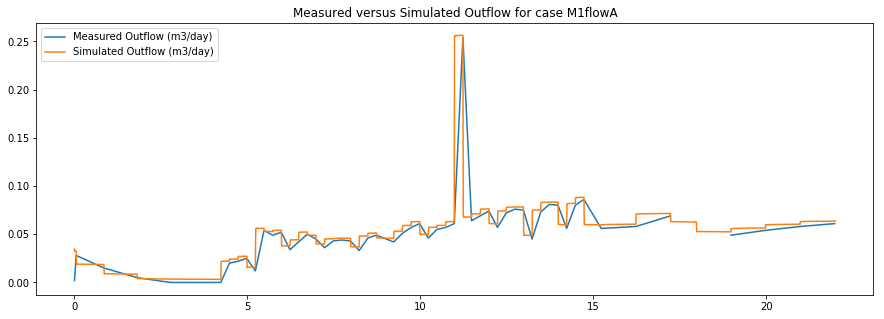

In [81]:
fig, ax = plt.subplots(figsize=(15, 5))

x = data["time_days"]
y = data["M1_outflow"] #* 86.4

x1 = m1flowA["time"]
# 4 m is the width of system
# 86.4 is the factor for recalculation from m3/day to l/s
y1 = (m1flowA["total_boundary_flux"] * 4) / 86.4 

ax.plot(x, y, label='Measured Outflow (m3/day)')
ax.plot(x1, y1, label='Simulated Outflow (m3/day)')
ax.legend(loc='upper left')
ax.set_title('Measured versus Simulated Outflow for case M1flowA')

plt.show()

We can clearly see that the simulated outflow does represent the measured outflow. Let's also check the cumulative inflow / outflow if we don't have any inconsistencies there.

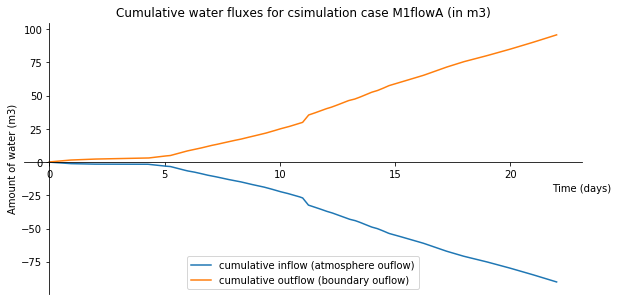

In [76]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(m1cumA["time"], m1cumA["c_act_surface_flux_atm"] * 4, label="cumulative inflow (atmosphere ouflow)")
ax.plot(m1cumA["time"], m1cumA["c_total_boundary_flux"] * 4, label="cumulative outflow (boundary ouflow)")
ax.legend(loc='lower center')
ax.set_title("Cumulative water fluxes for csimulation case M1flowA (in m3)")
ax.set_ylabel('Amount of water (m3)')
ax.set_xlabel('Time (days)', x=1)

# set the x-spine
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

### Case M3flowA - measured flow, import initial

#### Problem description

Flow data entered for simulation according to [chapter 5.4.1](#5-4-1).

For initial settings of pressure head the last layer of case M3_once_again were imported. 

#### Results

##### Input

In [77]:
hh.copy_output()

List of projects in the Hydrus working directory:
M1flowA
M1_initi
M1_once_
M3flowA
M3_initi
M3_once_

Enter the projet name from the printed list: M3flowA

List of output files in the M3flowA working directory
A_Level.out
Balance.out
Boundary.out
Check.out
Cum_Q.out
h.out
h_Mean.out
ObsNod.out
Run_Inf.out
th.out
v.out
v_Mean.out

Enter the file name(s) you want to copy: v_Mean.out Cum_Q.out

Filename: v_Mean.out
Source: C:\HYDRUS\Temp\~Hydrus3D_2xx\M3flowA\v_Mean.out
Destination: D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M3flowA\v_Mean.out
file v_Mean.out succesefuly copied to D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M3flowA\v_Mean.out
Filename: Cum_Q.out
Source: C:\HYDRUS\Temp\~Hydrus3D_2xx\M3flowA\Cum_Q.out
Destination: D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M3flowA\Cum_Q.out
file Cum_Q.out succesefuly copied to D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M3flowA\Cum_Q.out


In [78]:
m3flowA = hh.read_file()

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M3flowA\v_Mean.out were read into the Pandas DataFrame


In [79]:
m3cumA = hh.read_file()

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M3flowA\Cum_Q.out were read into the Pandas DataFrame


##### Output

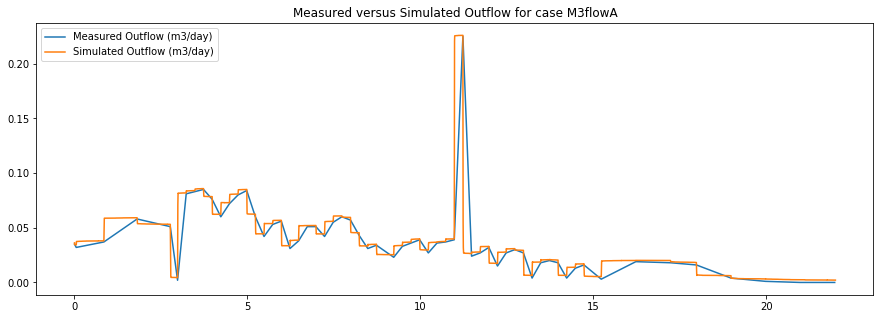

In [82]:
fig, ax = plt.subplots(figsize=(15, 5))

x = data["time_days"]
y = data["M3_outflow"]

x1 = m3flowA["time"]
# 4 m is the width of system
# 86.4 is the factor for recalculation from m3/day to l/s
y1 = (m3flowA["total_boundary_flux"] * 4) / 86.4 

ax.plot(x, y, label='Measured Outflow (m3/day)')
ax.plot(x1, y1, label='Simulated Outflow (m3/day)')
ax.legend(loc='upper left')
ax.set_title('Measured versus Simulated Outflow for case M3flowA')

plt.show()

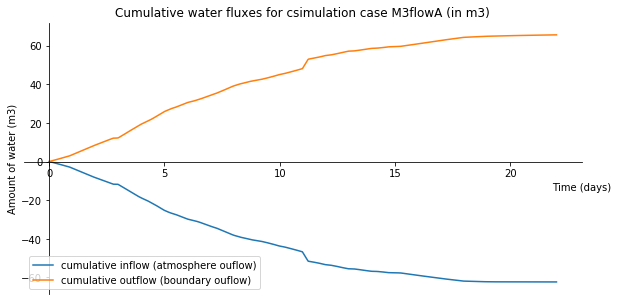

In [84]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(m3cumA["time"], m3cumA["c_act_surface_flux_atm"] * 4, label="cumulative inflow (atmosphere ouflow)")
ax.plot(m3cumA["time"], m3cumA["c_total_boundary_flux"] * 4, label="cumulative outflow (boundary ouflow)")
ax.legend(loc='lower left<div class="cite2c-biblio"></div>')
ax.set_title("Cumulative water fluxes for csimulation case M3flowA (in m3)")
ax.set_ylabel('Amount of water (m3)')
ax.set_xlabel('Time (days)', x=1)

# set the x-spine
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

### Case M1tracerA - tracer simulation of M1

#### Problem Description

For tracer study 67,02 g KBr were used as the tracer which represents 45 g of Br. The tracer was put in the division chamber in approx 200 l of water in the chamber. The whole mass of Br (45 g) will be used in the first run to see the behavior of the tracer.

#### Results

##### Input

In [22]:
hh.copy_output()

List of projects in the Hydrus working directory:
M1flowA
M1traceA
M1traceB
M1_initi
M1_once_
M3flowA
M3_initi
M3_once_

Enter the projet name from the printed list: M1traceA

List of output files in the M1traceA working directory
A_Level.out
Balance.out
Boundary.out
Check.out
conc1.out
Cum_Q.out
h.out
h_Mean.out
ObsNod.out
Run_Inf.out
solute1.out
th.out
v.out
v_Mean.out

Enter the file name(s) you want to copy: ObsNod.out

Filename: ObsNod.out
Source: C:\HYDRUS\Temp\~Hydrus3D_2xx\M1traceA\ObsNod.out
Destination: D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1traceA\ObsNod.out
file ObsNod.out succesefuly copied to D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1traceA\ObsNod.out


In [23]:
m1traceA = hh.read_file()

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1traceA\ObsNod.out were read into the Pandas DataFrame


In [31]:
m1traceA.head(20)

,time,hNew.0,theta.0,Temp.0,Conc.0,hNew.1,theta.1,Temp.1,Conc.1,hNew.2,...,Conc.2,hNew.3,theta.3,Temp.3,Conc.3,hNew.4,theta.4,Temp.4,Conc.4,Unnamed: 26
0,0.0000,0.004,0.37,20.0,0.00000,0.404,0.4,20.0,0.000000e+00,0.603,...,0.0,0.802,0.4,20.0,0.0,0.9,0.7,20.0,0.0,NaN
1,0.0001,0.004,0.37,20.0,0.01749,0.404,0.4,20.0,1.247000e-25,0.603,...,0.0,0.802,0.4,20.0,0.0,0.9,0.7,20.0,0.0,NaN
2,0.0002,0.004,0.37,20.0,0.06583,0.404,0.4,20.0,2.738000e-24,0.603,...,0.0,0.802,0.4,20.0,0.0,0.9,0.7,20.0,0.0,NaN
3,0.0003,0.004,0.37,20.0,0.16560,0.404,0.4,20.0,1.114000e-22,0.603,...,0.0,0.802,0.4,20.0,0.0,0.9,0.7,20.0,0.0,NaN
4,0.0005,0.004,0.37,20.0,0.32970,0.404,0.4,20.0,2.750000e-21,0.603,...,0.0,0.802,0.4,20.0,0.0,0.9,0.7,20.0,0.0,NaN
5,0.0008,0.004,0.37,20.0,0.62200,0.404,0.4,20.0,1.165000e-19,0.603,...,0.0,0.802,0.4,20.0,0.0,0.9,0.7,20.0,0.0,NaN
6,0.0010,0.004,0.37,20.0,0.94110,0.404,0.4,20.0,1.155000e-18,0.603,...,0.0,0.802,0.4,20.0,0.0,0.9,0.7,20.0,0.0,NaN
7,0.0013,0.004,0.37,20.0,1.19500,0.404,0.4,20.0,9.601000e-18,0.603,...,0.0,0.802,0.4,20.0,0.0,0.9,0.7,20.0,0.0,NaN
8,0.0017,0.004,0.37,20.0,1.28600,0.404,0.4,20.0,9.547000e-17,0.603,...,0.0,0.802,0.4,20.0,0.0,0.9,0.7,20.0,0.0,NaN
9,0.0021,0.004,0.37,20.0,1.24800,0.404,0.4,20.0,1.083000e-15,0.603,...,0.0,0.802,0.4,20.0,0.0,0.9,0.7,20.0,0.0,NaN


##### Output

In [36]:
obs_node1 = pd.read_csv("hydrus/M1traceA/M1traceA_Observation_Nodes_Concentration.txt", 
                        sep=" ",
                        skipinitialspace=True,
                        header=None
                       )

In [37]:
obs_node1

,0,1,2
0,1,0.0106,5.248000e-01
1,2,0.0296,2.554000e-01
2,3,0.0486,1.702000e-01
3,4,0.0612,1.502000e-01
4,5,0.0802,1.289000e-01
5,6,0.0992,1.126000e-01
6,7,0.1182,9.976000e-02
7,8,0.1372,8.931000e-02
8,9,0.1562,8.067000e-02
9,10,0.1752,7.340000e-02


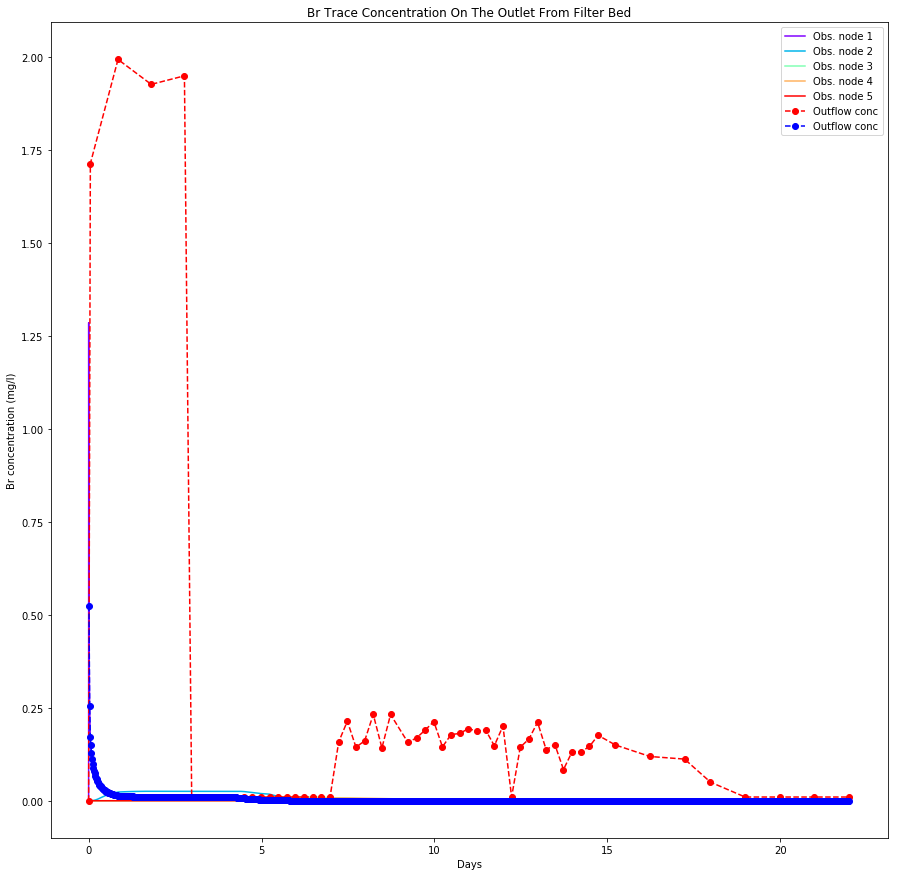

In [41]:
fig, ax = plt.subplots(figsize=(15, 15))

x = m1traceA["time"]
n = 5 # number of observation points

color=iter(cm.rainbow(np.linspace(0,1,n)))
for i in range(n):
    obs_conc = "Conc." + str(i)
    y = m1traceA[obs_conc]
    c = next(color)
    label = "Obs. node " + str(i + 1)
    ax.plot(x, y, c=c, label=label)

ax.plot(data["time_days"], data["M1_tracer_mg-l"], 'ro', label='Outflow conc', linestyle='dashed')
ax.plot(obs_node1[1], obs_node1[2], 'bo', label='Outflow conc', linestyle='dashed')

ax.set_xlabel('Days')
ax.set_ylabel('Br concentration (mg/l)')
ax.set_title('Br Trace Concentration On The Outlet From Filter Bed')
ax.legend(loc='upper right')

# ax.set_yscale('log')

plt.show()

**We can see here that even with the observation point 1 (top of inlet zone) the concentrations are smaller then the measured on the outflow from the wetland.**

### Conclusions From The Hydraulic Models

We developed a hydraulic model that it is probably not much representative to the real word system because of several reasons:

1. There is lack of input data and/or inconsistency in the data.
   - The inflow measurement is done before before the distribution of the flow the particular filter beds (total inflow measurement). But it seems that the distribution is not equal to all the wetlands and we don't the ratio of distribution.
2. The tracer study can't be simulated with the wetland model.
   - The concentrations of the tracer were highest in very short time after its introduction to the system (around 70 minutes), which is not normal state for horizontal flow wetland.
   - Even with changing the parameters of the model to extreme values, we cannot gain so rapid rise of the tracer on the outflow. We can't even gain such high concentrations on the inflow itself as were measured on the outflow.
   - It's obvious that if the measurements are right and we are not missing anything in the data (particularly the inflow data) there is some fundamental problem with the model itself which prevents it from representing such huge short-circuiting in the wetland.

## Hydrus Biokinetic Simulations

### Raw Input Data Introduction

#### Raw Data Table

In [8]:
c_data = pd.read_excel('data/input/concentrations_2018.xlsx')

In [4]:
c_data.head()

,Date,diff_t_days,abs_t_days,IN_NO3,IN_TOC,IN_TN,IN_TP,M1_NO3,M1_TOC,M1_TN,M1_TP,M2_NO3,M2_TOC,M2_TN,M2_TP,M3_NO3,M3_TOC,M3_TN,M3_TP
0,2019-08-07,0,0,NaN,NaN,NaN,NaN,0.35,NaN,NaN,NaN,0.86,NaN,NaN,NaN,0.25,NaN,NaN,NaN
1,2019-08-08,1,1,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,0.25,NaN,NaN,NaN,0.93,NaN,NaN,NaN
2,2019-08-09,1,2,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,0.25,NaN,NaN,NaN,0.25,NaN,NaN,NaN
3,2019-08-10,1,3,NaN,NaN,NaN,NaN,0.25,172.0,1.06,NaN,5.43,13.4,0.86,NaN,0.25,37.4,1.52,NaN
4,2019-08-11,1,4,NaN,NaN,NaN,NaN,0.25,181.0,1.18,NaN,6.05,6.6,3.05,NaN,0.25,27.9,1.39,NaN


We can sea that lot of data is missing in the table, particularly on the inflow to the system. We will fill this data later with a "randomized average" values. 

#### Raw Data Plots

In [348]:
c_data.columns

Index(['Date', 'diff_t_days', 'abs_t_days', 'IN_NO3', 'IN_TOC', 'IN_TN',
       'IN_TP', 'M1_NO3', 'M1_TOC', 'M1_TN', 'M1_TP', 'M2_NO3', 'M2_TOC',
       'M2_TN', 'M2_TP', 'M3_NO3', 'M3_TOC', 'M3_TN', 'M3_TP'],
      dtype='object')

In [349]:
c_data_plot = c_data.drop(['Date', 'diff_t_days', 'abs_t_days'], axis=1)
c_data_plot.head()

,IN_NO3,IN_TOC,IN_TN,IN_TP,M1_NO3,M1_TOC,M1_TN,M1_TP,M2_NO3,M2_TOC,M2_TN,M2_TP,M3_NO3,M3_TOC,M3_TN,M3_TP
0,NaN,NaN,NaN,NaN,0.35,NaN,NaN,NaN,0.86,NaN,NaN,NaN,0.25,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,0.25,NaN,NaN,NaN,0.93,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,0.25,NaN,NaN,NaN,0.25,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.25,172.0,1.06,NaN,5.43,13.4,0.86,NaN,0.25,37.4,1.52,NaN
4,NaN,NaN,NaN,NaN,0.25,181.0,1.18,NaN,6.05,6.6,3.05,NaN,0.25,27.9,1.39,NaN


##### Overall Boxplot

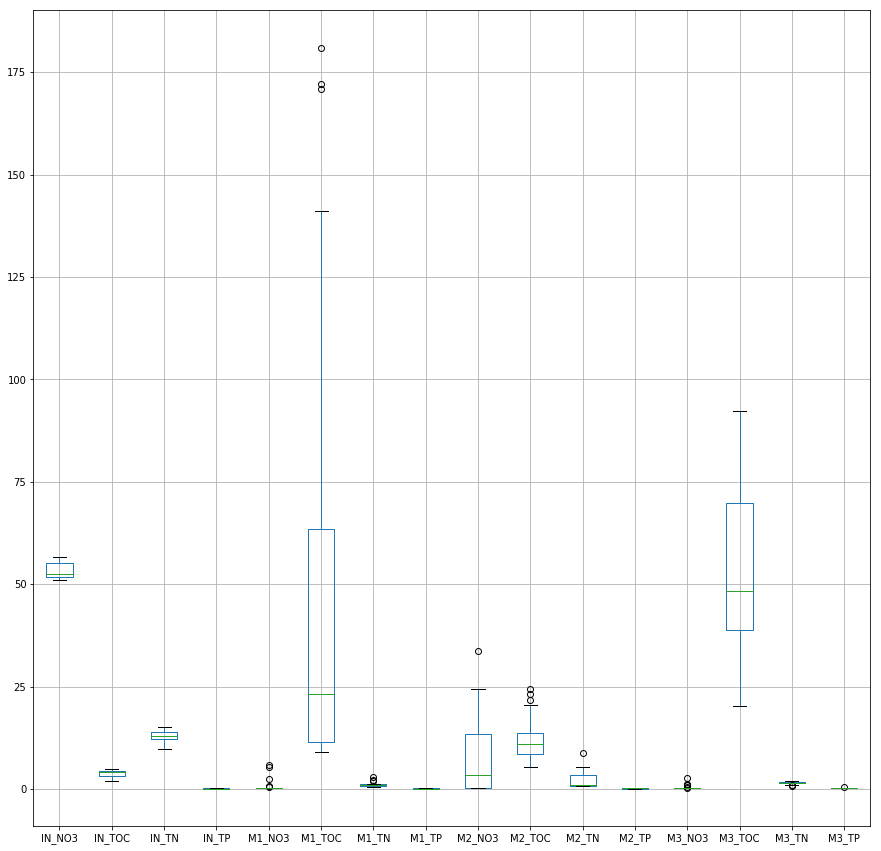

In [350]:
c_data_plot.boxplot(figsize=(15, 15))

##### Categorical Boxplots

In [351]:
# first we select columns according to polutants

NO3 = [col for col in c_data.columns if 'NO3' in col]
TOC = [col for col in c_data.columns if 'TOC' in col]
TN = [col for col in c_data.columns if 'TN' in col]
TP = [col for col in c_data.columns if 'TP' in col]

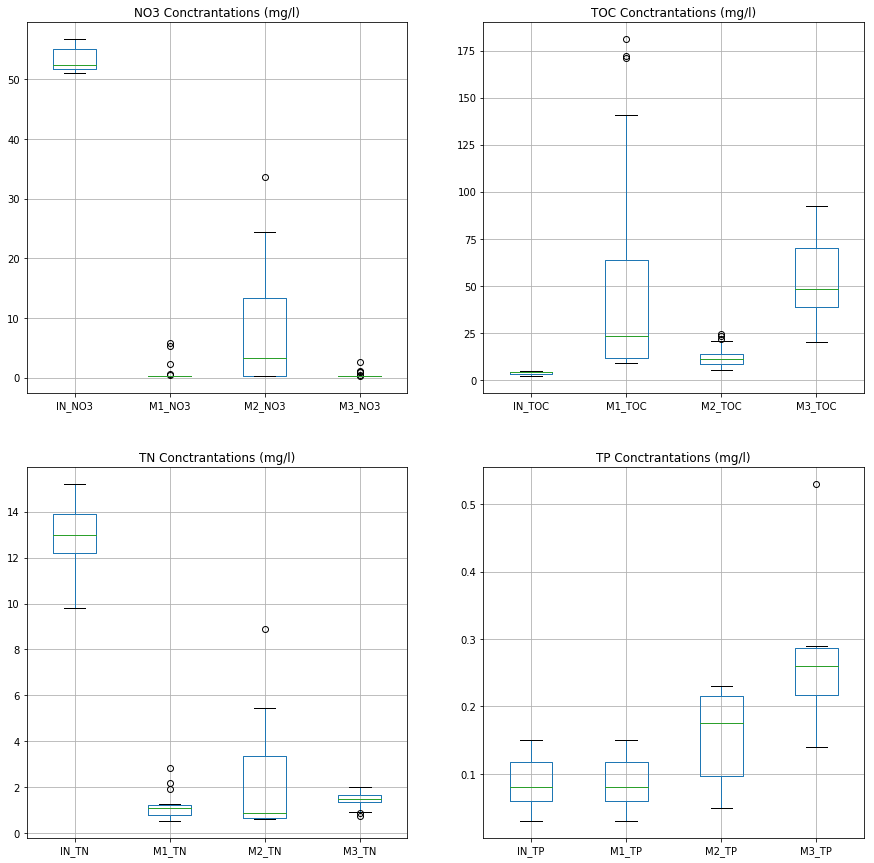

In [352]:
# then we can make seperate boxplots for the polutants categories

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

c_data[NO3].boxplot(ax=ax1)
c_data[TOC].boxplot(ax=ax2)
c_data[TN].boxplot(ax=ax3)
c_data[TP].boxplot(ax=ax4)

ax1.set_title('NO3 Conctrantations (mg/l)')
ax2.set_title('TOC Conctrantations (mg/l)')
ax3.set_title('TN Conctrantations (mg/l)')
ax4.set_title('TP Conctrantations (mg/l)')

plt.show()

##### Filling The Missing Inflow Data

In [353]:
# some descriptive statistic of the inflow concentrations

c_data[['IN_NO3', 'IN_TOC', 'IN_TN', 'IN_TP']].describe()

,IN_NO3,IN_TOC,IN_TN,IN_TP
count,12.000000,6.000000,6.000000,8.000000
mean,53.390000,3.725000,12.863333,0.088750
std,2.130245,1.126122,1.863702,0.041555
min,51.000000,1.950000,9.820000,0.030000
25%,51.787500,3.075000,12.207500,0.060000
50%,52.400000,4.150000,13.000000,0.080000
75%,55.060000,4.400000,13.912500,0.117500
max,56.700000,4.900000,15.200000,0.150000


As we have lot of missing values in the inflow data, we will fill the missing values with averages randomized by adding or subtracting the standard deviation (with randomization also in value of deviation)

In [355]:
# We will first define the average and std values

NO3_avg = c_data['IN_NO3'].mean()
TOC_avg = c_data['IN_TOC'].mean()
TN_avg = c_data['IN_TN'].mean()
TP_avg = c_data['IN_TP'].mean()

NO3_std = c_data['IN_NO3'].std()
TOC_std = c_data['IN_TOC'].std()
TN_std = c_data['IN_TN'].std()
TP_std = c_data['IN_TP'].std()

print('NO3 average is %s mg/l and standard deviation is %s' % (str(NO3_avg), str(NO3_std)))
print('TOC average is %s mg/l and standard deviation is %s' % (str(TOC_avg), str(TOC_std)))
print('TN average is %s mg/l and standard deviation is %s' % (str(TN_avg), str(TN_std)))
print('TP average is %s mg/l and standard deviation is %s' % (str(TP_avg), str(TP_std)))

NO3 average is 53.38999999999999 mg/l and standard deviation is 2.1302453977289697
TOC average is 3.724999999999999 mg/l and standard deviation is 1.126121663054219
TN average is 12.863333333333335 mg/l and standard deviation is 1.863702408290193
TP average is 0.08875000000000001 mg/l and standard deviation is 0.04155461122770509


In [356]:
# then we define the function for random calculation of values 
# on the basis of average and randomized deviation from average

import random
from operator import add, sub

def ran_op(avg, std, prec=3):
    ops = (add, sub)
    op = random.choice(ops)
    
    x = random.random()
    rand_std = x * std
    rand_value = op(avg, rand_std)
    
    return rand_value

In [357]:
# we will change the NaN values for zeros to ease the if statement in the for loop

c_data_fillna = c_data.fillna(0.0)

In [358]:
# inside the for loop iterating the rows of dataframe we will calculate and fill the missing value if the value is now 0

for index, row in c_data_fillna.iterrows():
    
    # calculation for IN_NO3 column
    if c_data_fillna.loc[index, 'IN_NO3'] == 0:
        # calculate the "randomized average" value
        x = float(ran_op(NO3_avg, NO3_std))
        # fill the place in the table with that value
        c_data_fillna.loc[index, 'IN_NO3'] = x
        
    # calculation for IN_TOC column
    if c_data_fillna.loc[index, 'IN_TOC'] == 0:
        x = float(ran_op(TOC_avg, TOC_std))
        c_data_fillna.loc[index, 'IN_TOC'] = x
        
    # calculation for IN_TN column
    if c_data_fillna.loc[index, 'IN_TN'] == 0:
        x = float(ran_op(TN_avg, TN_std))
        c_data_fillna.loc[index, 'IN_TN'] = x
        
    # calculation for IN_TP column
    if c_data_fillna.loc[index, 'IN_TP'] == 0:
        x = float(ran_op(TP_avg, TP_std))
        c_data_fillna.loc[index, 'IN_TP'] = x

### Cleaned Data

In [359]:
c_data_fillna[['IN_NO3', 'IN_TOC', 'IN_TN', 'IN_TP']].describe()

,IN_NO3,IN_TOC,IN_TN,IN_TP
count,33.000000,33.000000,33.000000,33.000000
mean,53.336935,3.597072,12.850371,0.084250
std,1.629230,0.757910,1.194547,0.028812
min,51.000000,1.950000,9.820000,0.030000
25%,51.988624,2.888264,11.834025,0.066143
50%,53.018102,3.654934,12.950000,0.071687
75%,54.820222,4.308555,13.953239,0.111217
max,56.700000,4.900000,15.200000,0.150000


In [360]:
c_data[['IN_NO3', 'IN_TOC', 'IN_TN', 'IN_TP']].describe()

,IN_NO3,IN_TOC,IN_TN,IN_TP
count,12.000000,6.000000,6.000000,8.000000
mean,53.390000,3.725000,12.863333,0.088750
std,2.130245,1.126122,1.863702,0.041555
min,51.000000,1.950000,9.820000,0.030000
25%,51.787500,3.075000,12.207500,0.060000
50%,52.400000,4.150000,13.000000,0.080000
75%,55.060000,4.400000,13.912500,0.117500
max,56.700000,4.900000,15.200000,0.150000


From the above tables describing the basic statistics of the inflow concentrations values we can see that the new average values are still very similar to the original data, so we preserve the consistency at least in one way.

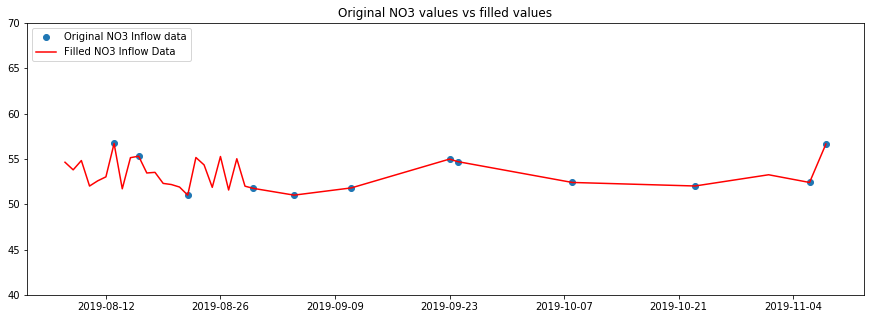

In [369]:
fig = plt.subplots(figsize=(15 ,5))

plt.plot(c_data['Date'], c_data['IN_NO3'], 'o', label='Original NO3 Inflow data')
plt.plot(c_data_fillna['Date'], c_data_fillna['IN_NO3'], 'r-', label='Filled NO3 Inflow Data')

plt.legend(loc='upper left')
plt.ylim(40,70)
plt.title('Original NO3 values vs filled values')

plt.show()

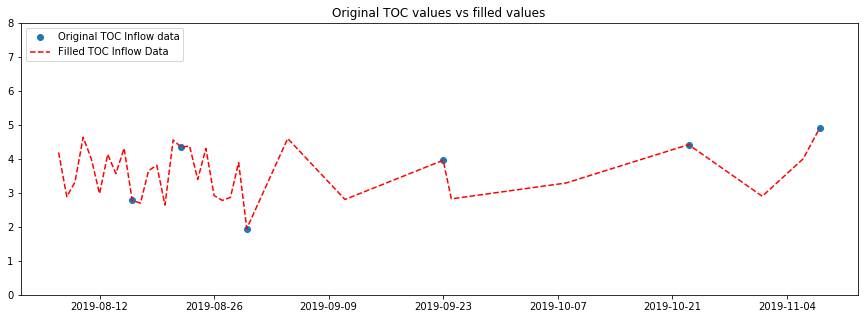

In [375]:
fig = plt.subplots(figsize=(15 ,5))

plt.plot(c_data['Date'], c_data['IN_TOC'], 'o', label='Original TOC Inflow data')
plt.plot(c_data_fillna['Date'], c_data_fillna['IN_TOC'], 'r--', label='Filled TOC Inflow Data')

plt.legend(loc='upper left')
plt.ylim(0,8)
plt.title('Original TOC values vs filled values')

plt.show()

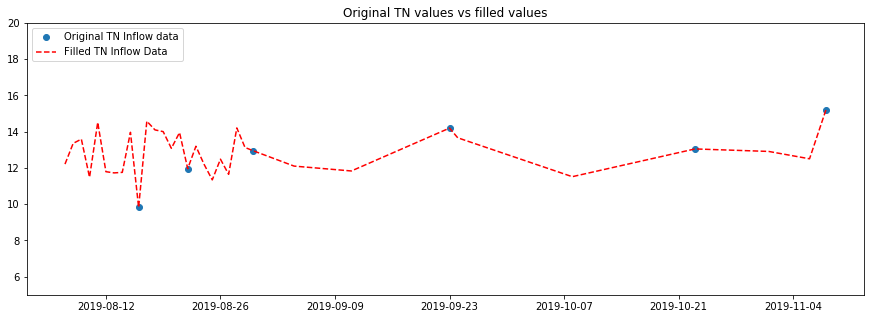

In [374]:
fig = plt.subplots(figsize=(15 ,5))

plt.plot(c_data['Date'], c_data['IN_TN'], 'o', label='Original TN Inflow data')
plt.plot(c_data_fillna['Date'], c_data_fillna['IN_TN'], 'r--', label='Filled TN Inflow Data')

plt.legend(loc='upper left')
plt.ylim(5, 20)
plt.title('Original TN values vs filled values')

plt.show()

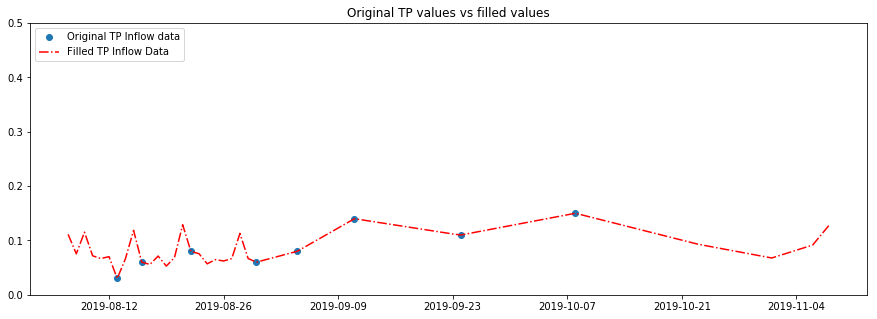

In [380]:
fig = plt.subplots(figsize=(15 ,5))

plt.plot(c_data['Date'], c_data['IN_TP'], 'o', label='Original TP Inflow data')
plt.plot(c_data_fillna['Date'], c_data_fillna['IN_TP'], 'r-.', label='Filled TP Inflow Data')

plt.legend(loc='upper left')
plt.ylim(0, 0.5)
plt.title('Original TP values vs filled values')

plt.show()

As one of the main parameters for Hydrus Biokinetic simulations are the COD concentration values (and preferably differentiated in degradable / slow / non-degradable) and we don't have any we need to "derive" it somehow from the data we already have. The COD on the inflow to the system can not be measured due to the lower limit (10 mg/l) of the method used in the study.

But we can deduce from this that the COD values are lower then this limit but should be somewhat higher then the TOC values. The ratio factors and correlation equations differ according to the type of wastewater and COD/TOC concetrations and can be somewhere between the 1-5. In this study we assume for now that the ratio between COD/TOC is 2, which still gives us values of COD lower then 10 mg/l.

**The data table is filled with COD values as such:**

In [381]:
c_data_fillna['IN_COD'] = c_data_fillna['IN_TOC'] * 2

And the final data table is exported to Excel file.

In [382]:
c_data_fillna.to_excel('data/output/concentrations_filled.xlsx', index=False)

### Case M1bioA - first simulation

#### Problem definition

For the solute reactive transport we must prepare the initial and variable inflow data for several components and processes.
The data was set as follows:

**Soluble components, S?**

| No. | abbr. | Name                          | Inflow (mg/l)                   | Initial (mg/l) | 
| --- | ----- | ----------------------------- | ------------------------------- | -------------- |
| 1.  | SO:   | Dissolved oxygen, O2          | drainage water is rich in O2: 8 | 8              |
| 2.  | SF:   | Ferm., readily biod.. s. COD  | (IN_TN - NO3asN) * 0.75         | first row      |
| 3.  | SA:   | Ferm. products as acetate     | no data: 0                      | 0              |
| 4.  | SI:   | Inert soluble COD             | no data: 1                      | 1              |
| 5.  | SNH:  | Ammonium and ammonia nitrogen | IN_TN - NO3asN - SF             | first row      |
| 6.  | SNO:  | Nitrate and nitrite nitrogen  | IN_NO3                          | first row      |
| 7.  | SSO4: | Sulphate sulphur              | no data: 0                      | 0              |
| 8.  | SH2S: | Dihydrogensulphide sulphur    | no data: 0                      | 0              |

**Particulate components, X?**

| No. | abbr. | Name                          | Inflow (mg/l)                   | Initial (mg/l) | 
| --- | ----- | ----------------------------- | ------------------------------- | -------------- |
| 9.  | XS:   | Slowly biod. particulate COD  | IN_TOC                          | first row      |
| 10. | XI:   | Inert particulate COD         | IN_COD - SF - SI - XS           | first row      |
| 11. | XH:   | Heterotrophic bacteria        | xxxxxxxxxxxxxx                  | 1              |
| 12. | XA:   | Autotrophic nitrifying bact.  | xxxxxxxxxxxxxx                  | 1              |
| 13. | XFB:  | Fermenting bacteria           | xxxxxxxxxxxxxx                  | 1              |
| 14. | XAMB: | Acetotrophic methanogenic b.  | xxxxxxxxxxxxxx                  | 1              |
| 15. | XASRB:| Acetotrophic sulph. reduc. b. | xxxxxxxxxxxxxx                  | 1              |
| 16. | XSOB: | Sulphide oxidising bacteria   | xxxxxxxxxxxxxx                  | 1              |

Whole Excel table with input data for the case can be found [here](data\output\M1bioA_inflow_conc.xlsx)

#### Results

##### Input

In [3]:
hh.copy_output()

List of projects in the Hydrus working directory:
M1bioA
M1traceB

Enter the projet name from the printed list: M1bioA

List of output files in the M1bioA working directory
A_Level.out
Balance.out
Boundary.out
Check.out
conc1.out
conc10.out
conc17.out
conc2.out
conc3.out
conc4.out
conc5.out
conc6.out
conc7.out
conc8.out
conc9.out
Cum_Q.out
effluent.out
h.out
h_Mean.out
ObsNod.out
ObsNodCh.out
Run_Inf.out
solute1.out
solute10.out
solute11.out
solute12.out
solute13.out
solute14.out
solute15.out
solute16.out
solute17.out
solute2.out
solute3.out
solute4.out
solute5.out
solute6.out
solute7.out
solute8.out
solute9.out
sorb10.out
sorb11.out
sorb12.out
sorb13.out
sorb14.out
sorb15.out
sorb16.out
sorb17.out
sorb2.out
sorb3.out
sorb4.out
sorb5.out
sorb9.out
th.out
v.out
v_Mean.out

Enter the file name(s) you want to copy: ObsNod.out

Filename: ObsNod.out
Source: C:\HYDRUS\Temp\~Hydrus3D_2xx\M1bioA\ObsNod.out
Destination: D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1bioA\ObsNod.out
file ObsNod

In [4]:
M1bioA = hh.read_file()

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1bioA\ObsNod.out were read into the Pandas DataFrame


##### Plot

In [6]:
sim_time = M1bioA['time']
sim_NO3 = M1bioA['Conc.5']

measured_time = c_data['abs_t_days']
measured_NO3 = c_data['M1_NO3']

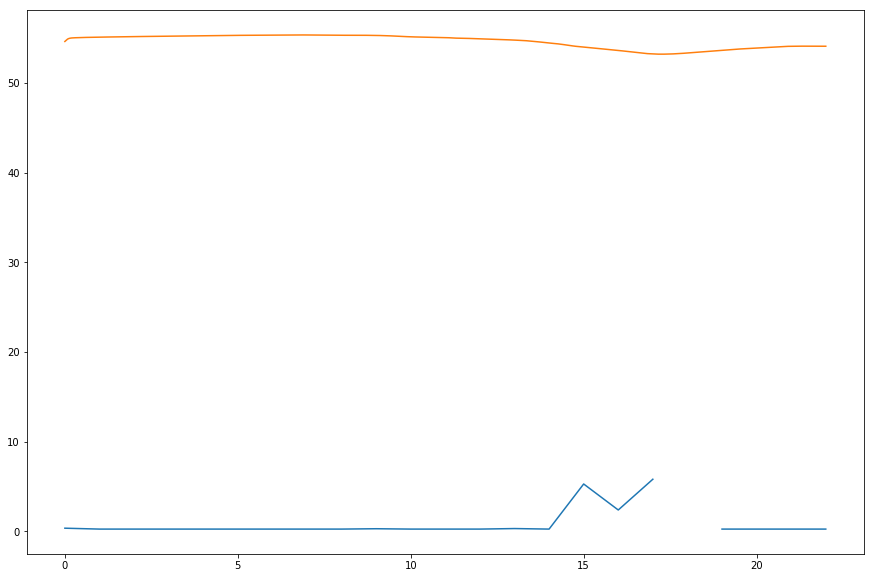

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(measured_time[:23], measured_NO3[:23])
ax.plot(sim_time, sim_NO3)

plt.show()

### Case M1bioB - with internal carbon source

#### Problem Definition

The internal carbon source was added to the model via **Root Uptake** process with negative uptake for L2 - Readilly biodegrable COD.
Root Water Uptake is set to 1 for the main filter layer (with wood-chips) and 0 for inlet zone and drainage layer.

**Also the initial settings were set to the first outflow values and to the inflow values as it better represent the real state**. Best illustration of this is on NO3 concentrations which are very low on the outflow from the very beginning but if we put the inflow values as initial, the outflow will be high for first couple of days in the simulation.

**First trial**:
- cRoot: -5000
- Transp: 0.0

*Result*

![](Hydrus/M1bioB/first_trial.png)

***Conclusion***

There is not enough carbon in the system so after several days the outflow values of NO3 are the same as inflow values.
We can try to increase the cRoot variable if we can see some change in behavior.

**Second Trial**

- cRoot: -10000
- Transp: 0.0

*Result*

![](Hydrus/M1bioB/second_trial.png)

***Conclusion***

The course of the NO3 concentratin seems to be the same as in the previous case and the effect of increasing cRoot parameter is nil. It seems (and it's quite logical) that the Water Uptake process (even with negative values) can only function with at least some transpiration level. We will try it in the third trial.

**Third Trial**

- cRoot: -5000
- Transp: 0.001

*Result*

![](Hydrus/M1bioB/third_trial.png)

***Conclusion***

We can see that to NO3 concentrations are still high but lower than in the previous cases. Something is happening in the system but it's still not enough. We try to increase to value of transpiration even more. 

**Fourth Trial**

- cRoot: -5000
- Transp: 0.01

*Result*

![](Hydrus/M1bioB/fourth_trial.png)

***Conclusion***

Finally we can see that there is nitrification occuring in wetland thanks to internal carbon source.

### Iteration of parameters

In next step we will try to change the main parameters of the internal carbon source (Water Uptake process) to get a better fit for outflow values.

next trials:
- SF5000
  - cRoot (SF): 1000

- SF1000
  - cRoot (SF): 1000
  
- XS5000
  - cRoot (XS): 5000
  
- XS1000
  - cRoot (XS): 1000
  
- SFXS
  - cRoot (SF): 1000
  - cRoot (XS): 1000

In [3]:
SF5000 = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\M1bioB\ObsNod.out were read into the Pandas DataFrame


In [4]:
SF1000 = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SF1000\ObsNod.out were read into the Pandas DataFrame


In [5]:
XS5000 = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_XS5000\ObsNod.out were read into the Pandas DataFrame


In [6]:
XS1000 = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_XS1000\ObsNod.out were read into the Pandas DataFrame


In [7]:
SFXS = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SFXS\ObsNod.out were read into the Pandas DataFrame


In [31]:
# NO3 data for various simulations

NO3_SF5000 = SF5000['NO3.1']
NO3_SF1000 = SF1000['NO3.1']
NO3_XS5000 = XS5000['NO3.1']
NO3_XS1000 = XS1000['NO3.1']
NO3_SFXS = SFXS['NO3.1']

NO3_measured = c_data['M1_NO3']

# COD data for various simulations

COD_SF5000 = SF5000['readillyCOD.1'] + SF5000['in_sol_COD.1'] + SF5000['slowlyCOD.1'] + SF5000['in_part_COD.1']
COD_SF1000 = SF1000['readillyCOD.1'] + SF1000['in_sol_COD.1'] + SF1000['slowlyCOD.1'] + SF1000['in_part_COD.1']
COD_XS5000 = XS5000['readillyCOD.1'] + XS5000['in_sol_COD.1'] + XS5000['slowlyCOD.1'] + XS5000['in_part_COD.1']
COD_XS1000 = XS1000['readillyCOD.1'] + XS1000['in_sol_COD.1'] + XS1000['slowlyCOD.1'] + XS1000['in_part_COD.1']
COD_SFXS = SFXS['readillyCOD.1'] + SFXS['in_sol_COD.1'] + SFXS['slowlyCOD.1'] + SFXS['in_part_COD.1']

TOC_measured = c_data['M1_TOC']

# time for various simulations

time_SF5000 = SF5000['time']
time_SF1000 = SF1000['time']
time_XS5000 = XS5000['time']
time_XS1000 = XS1000['time']
time_SFXS = SFXS['time']

time_measured = c_data['abs_t_days']

In [8]:
SFXS.columns

Index(['time', 'hNew.0', 'theta.0', 'Temp.0', 'oxygen.1', 'readillyCOD.1',
       'acetat.1', 'in_sol_COD.1', 'NH4.1', 'NO3.1', 'slowlyCOD.1',
       'in_part_COD.1', 'heterotrophic.1', 'autotrophic.1', 'fermenting.1',
       'methanogenic.1', 'sulphate_reducing.1', 'sulphide_oxidising.1',
       'Unnamed: 38'],
      dtype='object')

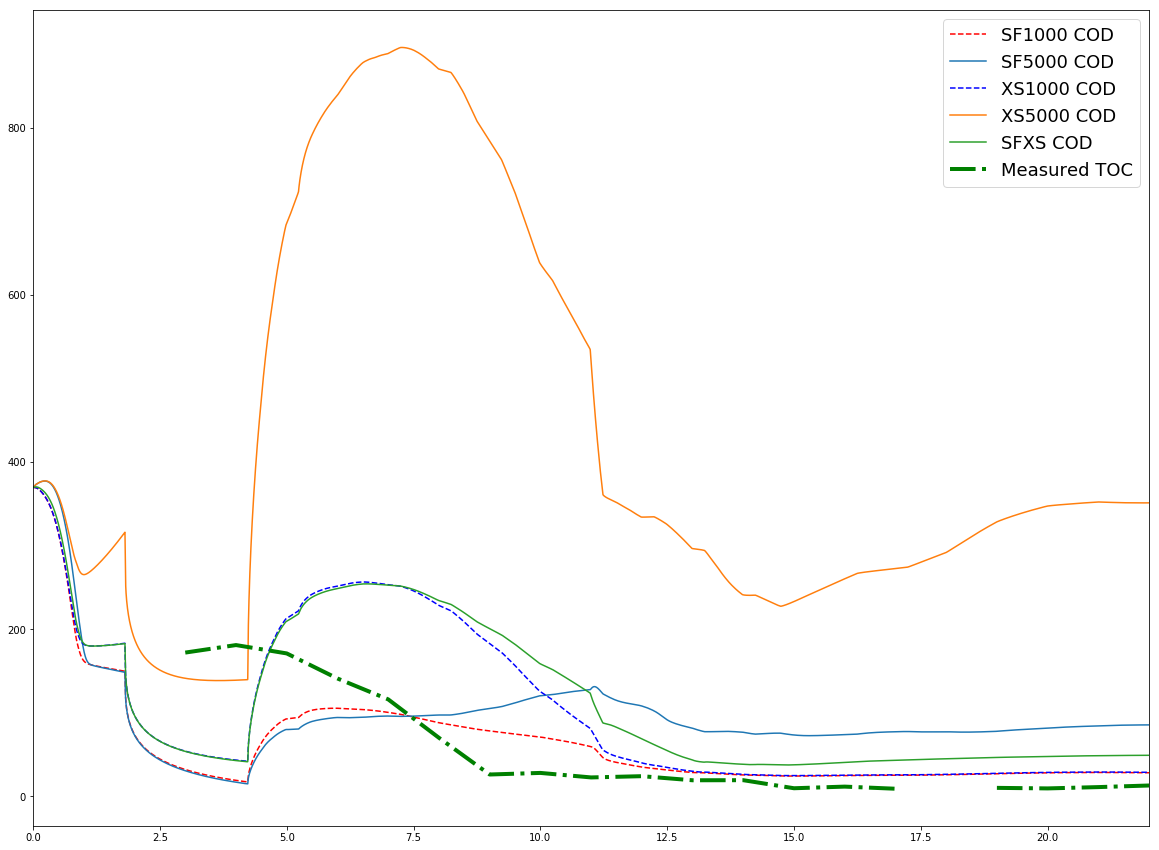

In [44]:
# COD plot

fig, ax = plt.subplots(figsize=(20, 15))

ax.plot(time_SF1000, COD_SF1000, 'r--', label='SF1000 COD')
ax.plot(time_SF5000, COD_SF5000, label='SF5000 COD')
ax.plot(time_XS1000, COD_XS1000, 'b--', label='XS1000 COD')
ax.plot(time_XS5000, COD_XS5000, label='XS5000 COD')
ax.plot(time_SFXS, COD_SFXS, label='SFXS COD')
ax.plot(time_measured, TOC_measured, 'g-.', linewidth=4.0, label='Measured TOC')

ax.legend(prop={'size': 18})
ax.set_xlim(0, 22)

plt.show()

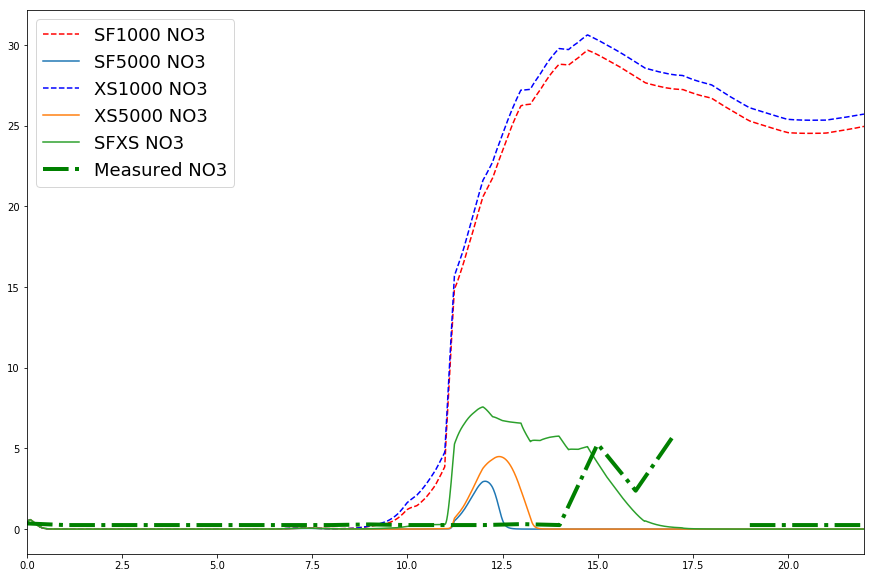

In [56]:
# NO3 plot

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(time_SF1000, NO3_SF1000, 'r--', label='SF1000 NO3')
ax.plot(time_SF5000, NO3_SF5000, label='SF5000 NO3')
ax.plot(time_XS1000, NO3_XS1000, 'b--', label='XS1000 NO3')
ax.plot(time_XS5000, NO3_XS5000, label='XS5000 NO3')
ax.plot(time_SFXS, NO3_SFXS, label='SFXS NO3')
ax.plot(time_measured, NO3_measured, 'g-.', linewidth=4.0, label='Measured NO3')

ax.legend(prop={'size': 18})
ax.set_xlim(0, 22)

plt.show()

***conclusion***

It seems from the plots, that the best that the best representation of the system is for trials of SF5000 and SFXS.

### SFXS and SF5000 iteration runs

next trials:
    
- SF5000a
  - cRoot (SF): 5000
  - initial SF: 100
  - initial XS: 200
  
- SF5000b
  - cRoot (SF): 5000
  - initial SF: 50
  - initial XS: 200
  
- SF5000c
  - cRoot (SF): 5000
  - initial SF: 100
  - initial XS: 300
  
- SFXSa
  - cRoot (SF): 500
  - cRoot (XS): 1500
    
- SFXSb
  - cRoot (SF): 250
  - cRoot (XS): 1500
    
- SFXSc
  - cRoot (SF): 125
  - cRoot (XS): 1500

#### SFXS iterations

In [58]:
SFXSa = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SFXSa\ObsNod.out were read into the Pandas DataFrame


In [46]:
SFXSb = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SFXSb\ObsNod.out were read into the Pandas DataFrame


In [47]:
SFXSc = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SFXSc\ObsNod.out were read into the Pandas DataFrame


In [59]:
# NO3 data for various simulations

NO3_SFXSa = SFXSa['NO3.1']
NO3_SFXSb = SFXSb['NO3.1']
NO3_SFXSc = SFXSc['NO3.1']

NO3_measured = c_data['M1_NO3']

# COD data for various simulations

COD_SFXSa = SFXSa['readillyCOD.1'] + SFXSa['in_sol_COD.1'] + SFXSa['slowlyCOD.1'] + SFXSa['in_part_COD.1']
COD_SFXSb = SFXSb['readillyCOD.1'] + SFXSb['in_sol_COD.1'] + SFXSb['slowlyCOD.1'] + SFXSb['in_part_COD.1']
COD_SFXSc = SFXSc['readillyCOD.1'] + SFXSc['in_sol_COD.1'] + SFXSc['slowlyCOD.1'] + SFXSc['in_part_COD.1']

TOC_measured = c_data['M1_TOC']

# time for various simulations

time_SFXSa = SFXSa['time']
time_SFXSb = SFXSb['time']
time_SFXSc = SFXSc['time']

time_measured = c_data['abs_t_days']

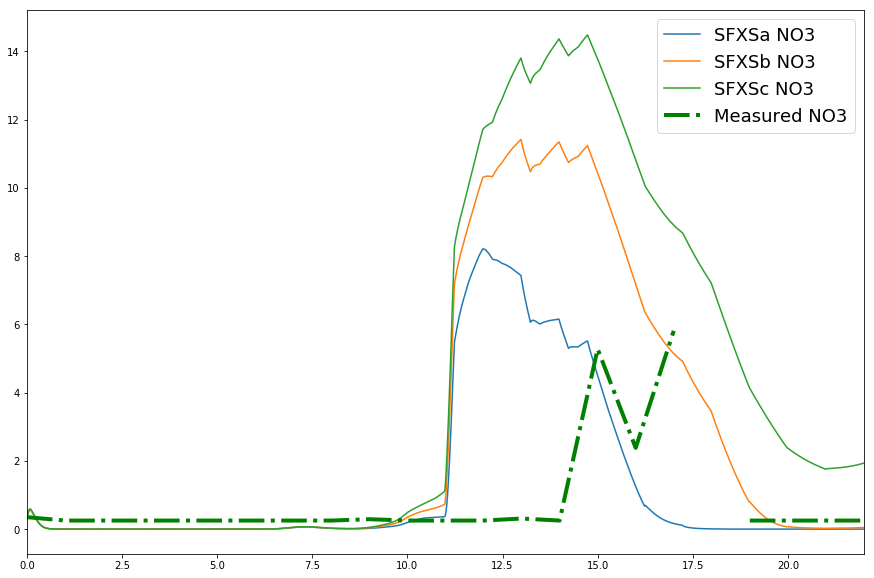

In [60]:
# NO3 plot

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(time_SFXSa, NO3_SFXSa, label='SFXSa NO3')
ax.plot(time_SFXSb, NO3_SFXSb, label='SFXSb NO3')
ax.plot(time_SFXSc, NO3_SFXSc, label='SFXSc NO3')
ax.plot(time_measured, NO3_measured, 'g-.', linewidth=4.0, label='Measured NO3')

ax.legend(prop={'size': 18})
ax.set_xlim(0, 22)

plt.show()

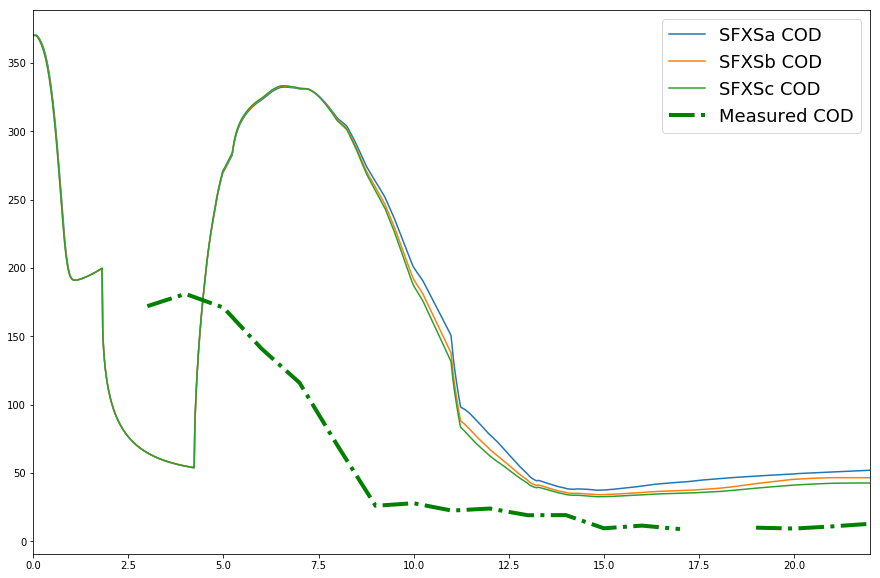

In [61]:
# COD plot

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(time_SFXSa, COD_SFXSa, label='SFXSa COD')
ax.plot(time_SFXSb, COD_SFXSb, label='SFXSb COD')
ax.plot(time_SFXSc, COD_SFXSc, label='SFXSc COD')
ax.plot(time_measured, TOC_measured, 'g-.', linewidth=4.0, label='Measured COD')

ax.legend(prop={'size': 18})
ax.set_xlim(0, 22)

plt.show()

#### SF5000 iterations

In [3]:
SF5000a = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SF5000a\ObsNod.out were read into the Pandas DataFrame


In [4]:
SF5000b = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SF5000b\ObsNod.out were read into the Pandas DataFrame


In [5]:
SF5000c = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SF5000c\ObsNod.out were read into the Pandas DataFrame


In [6]:
SF5000a['NO3.1'].describe()

count    2.912260e+05
mean     4.062070e-01
std      8.258097e-01
min      2.963292e-12
25%      6.886278e-05
50%      5.113985e-03
75%      1.044698e-01
max      2.899098e+00
Name: NO3.1, dtype: float64

In [7]:
# NO3 data for various simulations

NO3_SF5000a = SF5000a['NO3.1']
NO3_SF5000b = SF5000b['NO3.1']
NO3_SF5000c = SF5000c['NO3.1']

NO3_measured = c_data['M1_NO3']

# COD data for various simulations

COD_SF5000a = SF5000a['readillyCOD.1'] + SF5000a['in_sol_COD.1'] + SF5000a['slowlyCOD.1'] + SF5000a['in_part_COD.1']
COD_SF5000b = SF5000b['readillyCOD.1'] + SF5000b['in_sol_COD.1'] + SF5000b['slowlyCOD.1'] + SF5000b['in_part_COD.1']
COD_SF5000c = SF5000c['readillyCOD.1'] + SF5000c['in_sol_COD.1'] + SF5000c['slowlyCOD.1'] + SF5000c['in_part_COD.1']

TOC_measured = c_data['M1_TOC']

# time for various simulations

time_SF5000a = SF5000a['time']
time_SF5000b = SF5000b['time']
time_SF5000c = SF5000c['time']

time_measured = c_data['abs_t_days']

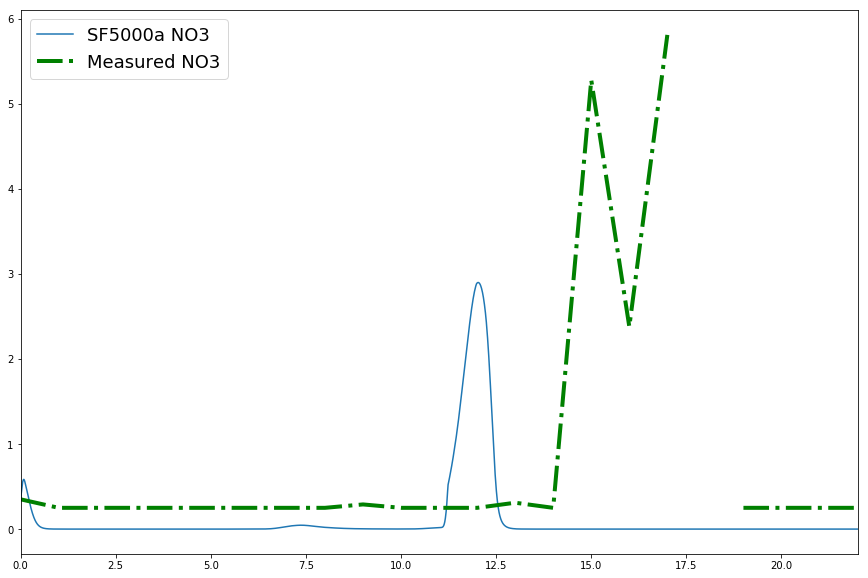

In [10]:
# NO3 plot

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(time_SF5000a, NO3_SF5000a, label='SF5000a NO3')
ax.plot(time_SF5000b, NO3_SF5000b, label='SF5000b NO3')
ax.plot(time_SF5000c, NO3_SF5000c, label='SF5000c NO3')
ax.plot(time_measured, NO3_measured, 'g-.', linewidth=4.0, label='Measured NO3')

ax.legend(prop={'size': 18})
ax.set_xlim(0, 22)

plt.show()

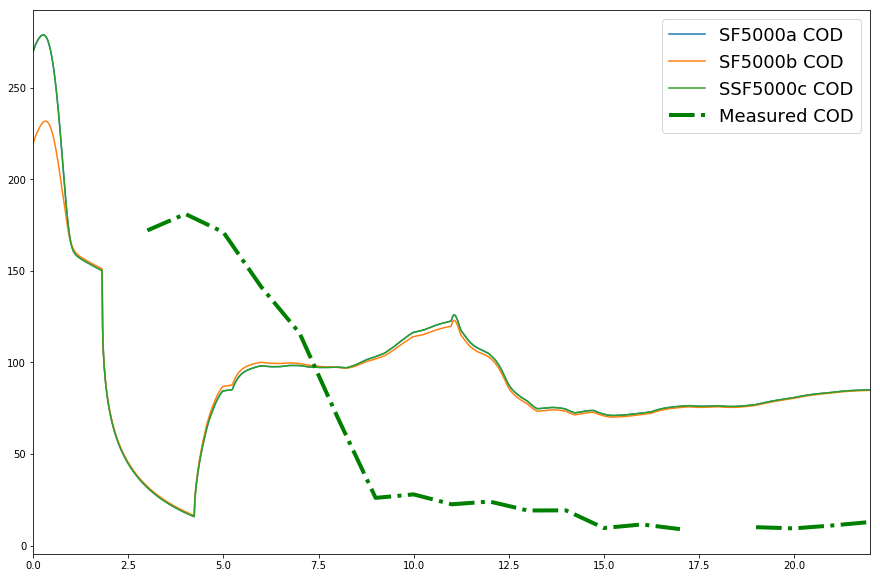

In [67]:
# COD plot

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(time_SF5000a, COD_SF5000a, label='SF5000a COD')
ax.plot(time_SF5000b, COD_SF5000b, label='SF5000b COD')
ax.plot(time_SF5000c, COD_SF5000c, label='SSF5000c COD')
ax.plot(time_measured, TOC_measured, 'g-.', linewidth=4.0, label='Measured COD')

ax.legend(prop={'size': 18})
ax.set_xlim(0, 22)

plt.show()

#### SFXSa iterations

SFXSa1
- Ks: values * 0.75

SFXSa2
- Ks: values * 0.5

SFXSa3
- Ks: values * 0.25

SFXSa4
- Temp: 15°C

SFXSa5
- Temp: 10°C

SFXSa6
- Temp: 5°C

In [4]:
SFXSa1 = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SFXSa1\ObsNod.out were read into the Pandas DataFrame


In [5]:
SFXSa2 = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SFXSa2\ObsNod.out were read into the Pandas DataFrame


In [6]:
SFXSa3 = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SFXSa3\ObsNod.out were read into the Pandas DataFrame


In [7]:
SFXSa4 = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SFXSa4\ObsNod.out were read into the Pandas DataFrame


In [10]:
SFXSa5 = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SFXSa5\ObsNod.out were read into the Pandas DataFrame


In [11]:
SFXSa6 = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SFXSa6\ObsNod.out were read into the Pandas DataFrame


In [12]:
# NO3 data for various simulations

NO3_SFXSa1 = SFXSa1['NO3.1']
NO3_SFXSa2 = SFXSa2['NO3.1']
NO3_SFXSa3 = SFXSa3['NO3.1']
NO3_SFXSa4 = SFXSa4['NO3.1']
NO3_SFXSa5 = SFXSa5['NO3.1']
NO3_SFXSa6 = SFXSa6['NO3.1']

NO3_measured = c_data['M1_NO3']

# COD data for various simulations

COD_SFXSa1 = SFXSa1['readillyCOD.1'] + SFXSa1['in_sol_COD.1'] + SFXSa1['slowlyCOD.1'] + SFXSa1['in_part_COD.1']
COD_SFXSa2 = SFXSa2['readillyCOD.1'] + SFXSa2['in_sol_COD.1'] + SFXSa2['slowlyCOD.1'] + SFXSa2['in_part_COD.1']
COD_SFXSa3 = SFXSa3['readillyCOD.1'] + SFXSa3['in_sol_COD.1'] + SFXSa3['slowlyCOD.1'] + SFXSa3['in_part_COD.1']
COD_SFXSa4 = SFXSa4['readillyCOD.1'] + SFXSa4['in_sol_COD.1'] + SFXSa4['slowlyCOD.1'] + SFXSa4['in_part_COD.1']
COD_SFXSa5 = SFXSa5['readillyCOD.1'] + SFXSa5['in_sol_COD.1'] + SFXSa5['slowlyCOD.1'] + SFXSa5['in_part_COD.1']
COD_SFXSa6 = SFXSa6['readillyCOD.1'] + SFXSa6['in_sol_COD.1'] + SFXSa6['slowlyCOD.1'] + SFXSa6['in_part_COD.1']

TOC_measured = c_data['M1_TOC']

# time for various simulations

time_SFXSa1 = SFXSa1['time']
time_SFXSa2 = SFXSa2['time']
time_SFXSa3 = SFXSa3['time']
time_SFXSa4 = SFXSa4['time']
time_SFXSa5 = SFXSa5['time']
time_SFXSa6 = SFXSa6['time']

time_measured = c_data['abs_t_days']

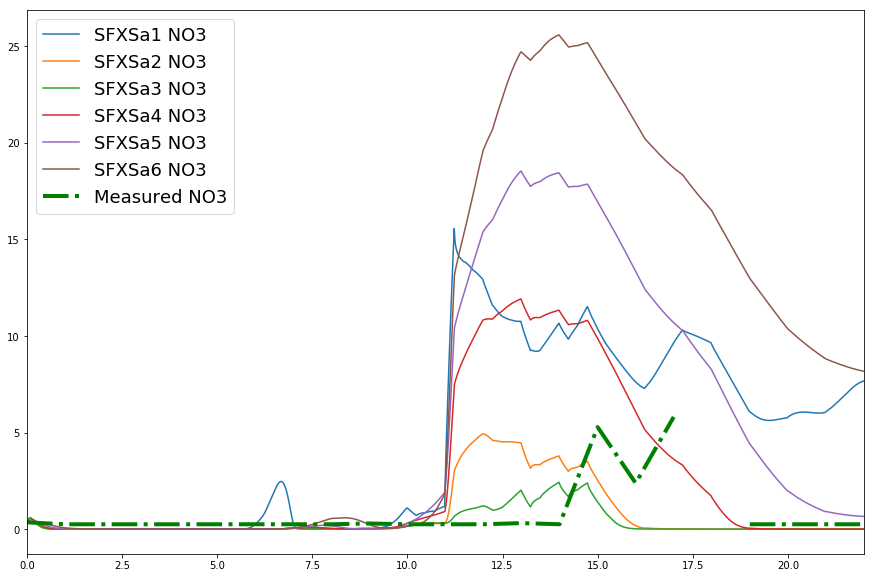

In [14]:
# NO3 plot

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(time_SFXSa1, NO3_SFXSa1, label='SFXSa1 NO3')
ax.plot(time_SFXSa2, NO3_SFXSa2, label='SFXSa2 NO3')
ax.plot(time_SFXSa3, NO3_SFXSa3, label='SFXSa3 NO3')
ax.plot(time_SFXSa4, NO3_SFXSa4, label='SFXSa4 NO3')
ax.plot(time_SFXSa5, NO3_SFXSa5, label='SFXSa5 NO3')
ax.plot(time_SFXSa6, NO3_SFXSa6, label='SFXSa6 NO3')
ax.plot(time_measured, NO3_measured, 'g-.', linewidth=4.0, label='Measured NO3')

ax.legend(prop={'size': 18})
ax.set_xlim(0, 22)

plt.show()

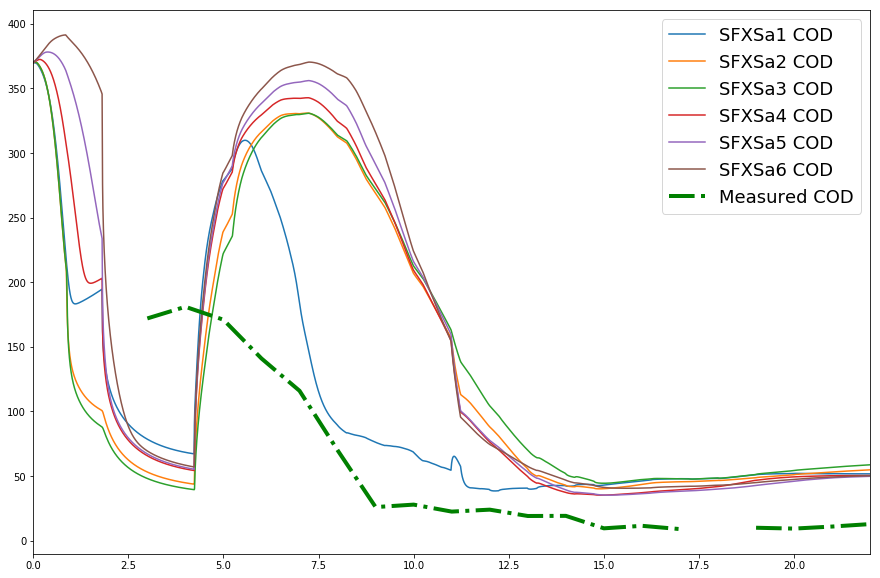

In [15]:
# COD plot

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(time_SFXSa1, COD_SFXSa1, label='SFXSa1 COD')
ax.plot(time_SFXSa2, COD_SFXSa2, label='SFXSa2 COD')
ax.plot(time_SFXSa3, COD_SFXSa3, label='SFXSa3 COD')
ax.plot(time_SFXSa4, COD_SFXSa4, label='SFXSa4 COD')
ax.plot(time_SFXSa5, COD_SFXSa5, label='SFXSa5 COD')
ax.plot(time_SFXSa6, COD_SFXSa6, label='SFXSa6 COD')
ax.plot(time_measured, TOC_measured, 'g-.', linewidth=4.0, label='Measured COD')

ax.legend(prop={'size': 18})
ax.set_xlim(0, 22)

plt.show()

#### Yet another SFXSa iterations

SFXSaa

    Initial slowly biodegr.: 200

SFXSab

    Initial slowly biodegr.: 250

SFXSac

    Initial slowly biodegr.: 300


In [17]:
SFXSaa = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SFXSaa\ObsNod.out were read into the Pandas DataFrame


In [18]:
SFXSab = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SFXSab\ObsNod.out were read into the Pandas DataFrame


In [19]:
SFXSac = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SFXSab\ObsNod.out were read into the Pandas DataFrame


In [20]:
# NO3 data for various simulations

NO3_SFXSaa = SFXSaa['NO3.1']
NO3_SFXSab = SFXSab['NO3.1']
NO3_SFXSac = SFXSac['NO3.1']

NO3_measured = c_data['M1_NO3']

# COD data for various simulations

COD_SFXSaa = SFXSaa['readillyCOD.1'] + SFXSaa['in_sol_COD.1'] + SFXSaa['slowlyCOD.1'] + SFXSaa['in_part_COD.1']
COD_SFXSab = SFXSab['readillyCOD.1'] + SFXSab['in_sol_COD.1'] + SFXSab['slowlyCOD.1'] + SFXSab['in_part_COD.1']
COD_SFXSac = SFXSac['readillyCOD.1'] + SFXSac['in_sol_COD.1'] + SFXSac['slowlyCOD.1'] + SFXSac['in_part_COD.1']

TOC_measured = c_data['M1_TOC']

# time for various simulations

time_SFXSaa = SFXSaa['time']
time_SFXSab = SFXSab['time']
time_SFXSac = SFXSac['time']

time_measured = c_data['abs_t_days']

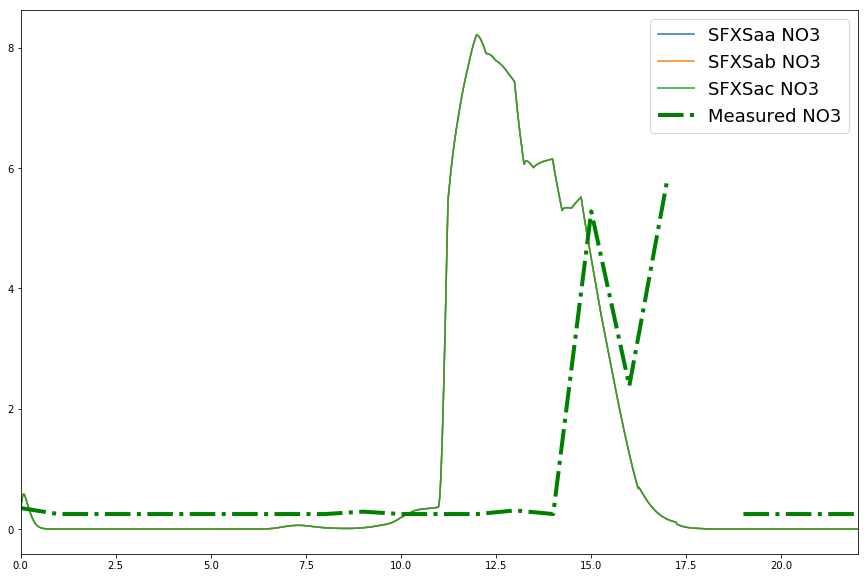

In [21]:
# NO3 plot

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(time_SFXSaa, NO3_SFXSaa, label='SFXSaa NO3')
ax.plot(time_SFXSab, NO3_SFXSab, label='SFXSab NO3')
ax.plot(time_SFXSac, NO3_SFXSac, label='SFXSac NO3')
ax.plot(time_measured, NO3_measured, 'g-.', linewidth=4.0, label='Measured NO3')

ax.legend(prop={'size': 18})
ax.set_xlim(0, 22)

plt.show()

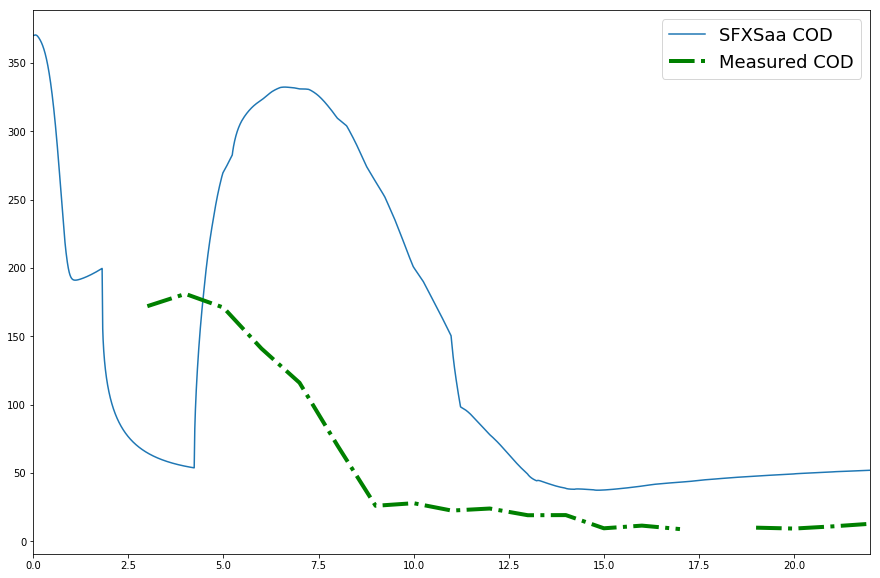

In [23]:
# COD plot

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(time_SFXSaa, COD_SFXSaa, label='SFXSaa COD')
#ax.plot(time_SFXSab, COD_SFXSab, label='SFXSab COD')
#ax.plot(time_SFXSac, COD_SFXSac, label='SFXSac COD')
ax.plot(time_measured, TOC_measured, 'g-.', linewidth=4.0, label='Measured COD')

ax.legend(prop={'size': 18})
ax.set_xlim(0, 22)

plt.show()

#### SFXS dispersivity iteration

SFXS1
- Disp.L. - 0.1

SFXS2
- Disp.L. - 0.2

SFXS3
- Disp.L. - 0.3

SFXS4
- Disp.L. - 0.4

SFXS6
- Disp.L. - 0.6

SFXS_05
- Disp.T. - 0.05

SFXS_2
- Disp.T. - 0.2

In [2]:
SFXS1 = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SFXS1\ObsNod.out were read into the Pandas DataFrame


In [3]:
SFXS2 = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SFXS2\ObsNod.out were read into the Pandas DataFrame


In [4]:
SFXS3 = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SFXS3\ObsNod.out were read into the Pandas DataFrame


In [6]:
SFXS4 = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SFXS4\ObsNod.out were read into the Pandas DataFrame


In [7]:
SFXS6 = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SFXS6\ObsNod.out were read into the Pandas DataFrame


In [11]:
SFXS = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SFXS\ObsNod.out were read into the Pandas DataFrame


In [14]:
SFXS_05 = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SFXS_05\ObsNod.out were read into the Pandas DataFrame


In [15]:
SFXS_2 = hh.read_file(proc_type='cwm1')

Data from D:\OneDrive\AC_DS\wetlands\VelkyRybnik\hydrus\H3D2_SFXS_2\ObsNod.out were read into the Pandas DataFrame


In [17]:
# NO3 data for various simulations

NO3_SFXS1 = SFXS1['NO3.1']
NO3_SFXS2 = SFXS2['NO3.1']
NO3_SFXS3 = SFXS3['NO3.1']
NO3_SFXS4 = SFXS4['NO3.1']
NO3_SFXS6 = SFXS6['NO3.1']
NO3_SFXS = SFXS['NO3.1']
NO3_SFXS_05 = SFXS_05['NO3.1']
NO3_SFXS_2 = SFXS_2['NO3.1']

NO3_measured = c_data['M1_NO3']

# COD data for various simulations

COD_SFXS1 = SFXS1['readillyCOD.1'] + SFXS1['in_sol_COD.1'] + SFXS1['slowlyCOD.1'] + SFXS1['in_part_COD.1']
COD_SFXS2 = SFXS2['readillyCOD.1'] + SFXS2['in_sol_COD.1'] + SFXS2['slowlyCOD.1'] + SFXS2['in_part_COD.1']
COD_SFXS3 = SFXS3['readillyCOD.1'] + SFXS3['in_sol_COD.1'] + SFXS3['slowlyCOD.1'] + SFXS3['in_part_COD.1']
COD_SFXS4 = SFXS4['readillyCOD.1'] + SFXS4['in_sol_COD.1'] + SFXS4['slowlyCOD.1'] + SFXS4['in_part_COD.1']
COD_SFXS6 = SFXS6['readillyCOD.1'] + SFXS6['in_sol_COD.1'] + SFXS6['slowlyCOD.1'] + SFXS6['in_part_COD.1']
COD_SFXS = SFXS['readillyCOD.1'] + SFXS['in_sol_COD.1'] + SFXS['slowlyCOD.1'] + SFXS['in_part_COD.1']
COD_SFXS_05 = SFXS_05['readillyCOD.1'] + SFXS_05['in_sol_COD.1'] + SFXS_05['slowlyCOD.1'] + SFXS_05['in_part_COD.1']
COD_SFXS_2 = SFXS_2['readillyCOD.1'] + SFXS_2['in_sol_COD.1'] + SFXS_2['slowlyCOD.1'] + SFXS_2['in_part_COD.1']

TOC_measured = c_data['M1_TOC']

# time for various simulations

time_SFXS1 = SFXS1['time']
time_SFXS2 = SFXS2['time']
time_SFXS3 = SFXS3['time']
time_SFXS4 = SFXS4['time']
time_SFXS6 = SFXS6['time']
time_SFXS = SFXS['time']
time_SFXS_05 = SFXS_05['time']
time_SFXS_2 = SFXS_2['time']

time_measured = c_data['abs_t_days']

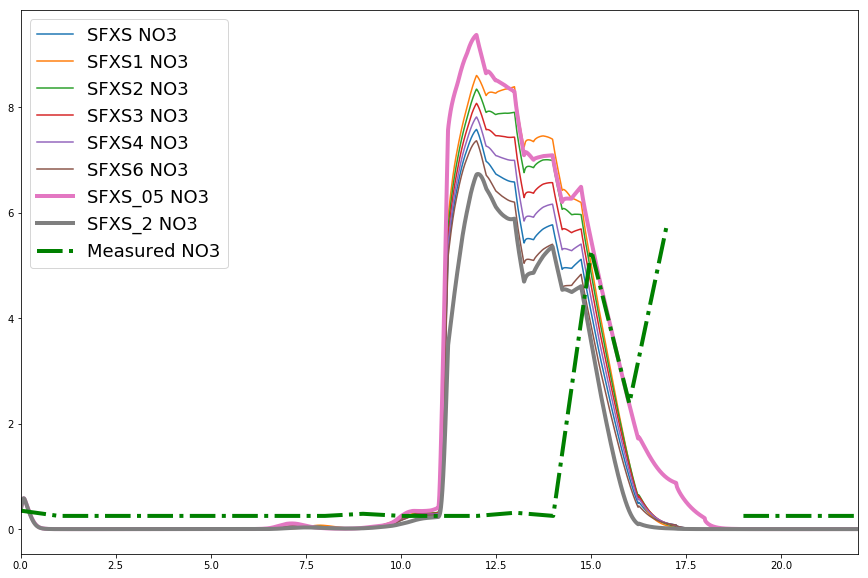

In [19]:
# NO3 plot

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(time_SFXS, NO3_SFXS, label='SFXS NO3')
ax.plot(time_SFXS1, NO3_SFXS1, label='SFXS1 NO3')
ax.plot(time_SFXS2, NO3_SFXS2, label='SFXS2 NO3')
ax.plot(time_SFXS3, NO3_SFXS3, label='SFXS3 NO3')
ax.plot(time_SFXS4, NO3_SFXS4, label='SFXS4 NO3')
ax.plot(time_SFXS6, NO3_SFXS6, label='SFXS6 NO3')
ax.plot(time_SFXS_05, NO3_SFXS_05, label='SFXS_05 NO3', linewidth=4.0)
ax.plot(time_SFXS_2, NO3_SFXS_2, label='SFXS_2 NO3', linewidth=4.0)
ax.plot(time_measured, NO3_measured, 'g-.', linewidth=4.0, label='Measured NO3')

ax.legend(prop={'size': 18})
ax.set_xlim(0, 22)

plt.show()

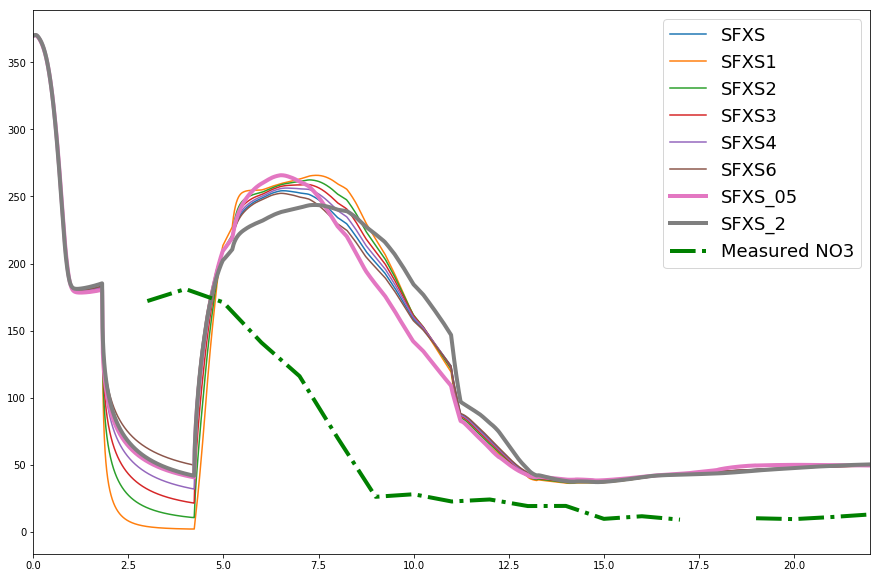

In [21]:
# COD plot

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(time_SFXS, COD_SFXS, label='SFXS')
ax.plot(time_SFXS1, COD_SFXS1, label='SFXS1')
ax.plot(time_SFXS2, COD_SFXS2, label='SFXS2')
ax.plot(time_SFXS3, COD_SFXS3, label='SFXS3')
ax.plot(time_SFXS4, COD_SFXS4, label='SFXS4')
ax.plot(time_SFXS6, COD_SFXS6, label='SFXS6')
ax.plot(time_SFXS_05, COD_SFXS_05, label='SFXS_05', linewidth=4.0)
ax.plot(time_SFXS_2, COD_SFXS_2, label='SFXS_2', linewidth=4.0)
ax.plot(time_measured, TOC_measured, 'g-.', linewidth=4.0, label='Measured NO3')

ax.legend(prop={'size': 18})
ax.set_xlim(0, 22)

plt.show()

## Bibliography <a class="tocSkip">

<div class="cite2c-biblio"></div>